In [1]:
import warnings
# just for visualization
warnings.filterwarnings('ignore')

In [2]:
%reset -f
import xarray as xr
import numpy as np
import aoespy as ap
import matplotlib.pyplot as plt

## Pre-industrial precipitation biases

In [3]:
data=ap.load("/project/CAREER_PWC/nburls/DeepMIP_Eocene/DeepMIP_Eocene_Hydro/data/DeepmipEocene_processed_data_Jan2023.npz")
s=(ap.array(data.files)).astype(str)
for i in range(len(s)):
	ii=str(s[i]); print(ii)
	e=ii+"=data['"+ii+"']";
	exec(e)

sftlf
ts
pr
ev
ps
q
v
u
lon
lat
lev


In [4]:
# Convert to mm/day
ev=ev*86400
pr=pr*86400
pe=pr-ev

In [5]:
dir='/shared/CAREER_PWC/DeepMIP-Eocene/User_Model_Database_v1.0/'
mdir=['CESM','COSMOS','GFDL','HadCM3','HadCM3','INMCM','IPSL','MIROC','NorESM']
model=['CESM1.2_CAM5','COSMOS-landveg_r2413','GFDL_CM2.1','HadCM3B_M2.1aN','HadCM3BL_M2.1aN','INM-CM4-8','IPSLCM5A2','MIROC4m','NorESM1_F']

proj=['piControl','deepmip_sens_1xCO2','deepmip_sens_2xCO2','deepmip_stand_3xCO2','deepmip_sens_4xCO2',\
      'deepmip_stand_6xCO2','deepmip_sens_9xCO2']

model_name=['CESM','COSMOS','GFDL','HadCM3B','HadCM3BL','INMCM','IPSL','MIROC','NorESM']

In [6]:
proj_name=['PI Control','1xCO2','2xCO2','3xCO2','4xCO2',\
      '6xCO2','9xCO2']

In [7]:
## CMAP data cliamtology
cmap=xr.open_dataset("/project/airsea/deepMIP/data/precip.mon.ltm.nc")

In [8]:
pr_picontrol=pr[:,:,:,0]

In [9]:
obspr=np.nanmean(cmap.precip.data,0)

In [10]:
obspr=ap.interp(obspr[::-1,:],cmap.lon.data,cmap.lat.data[::-1],lon,lat)

In [11]:
def rmse(model,obs):
    return np.sqrt(np.nanmean((model-obs)**2))

In [12]:
piRMSE=np.zeros(len(model))
for i in range(len(model)):
           print(model[i])
           piRMSE[i]=rmse(pr_picontrol[:,:,i].flatten(),obspr.flatten())
        
MMMpiRMSE=rmse(np.nanmean(pr_picontrol[:,:,:],2).flatten(),obspr.flatten())

CESM1.2_CAM5
COSMOS-landveg_r2413
GFDL_CM2.1
HadCM3B_M2.1aN
HadCM3BL_M2.1aN
INM-CM4-8
IPSLCM5A2
MIROC4m
NorESM1_F


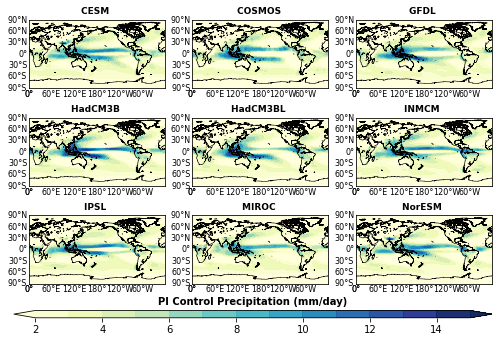

In [13]:
#fig=plt.figure(figsize=(11,6.5))
#fig=plt.figure(figsize=(8.3,11.7)) # A4
fig=plt.figure(figsize=(8.3,5.1))
#plt.subplots_adjust(left=.02, bottom=.05, right=.98, top=.88,hspace=.3,wspace=.2)
run=1
for i in range(len(mdir)):
        if np.isnan(np.nanmean(pr_picontrol[:,:,i]))==False:
            plt.subplot(3,3,run)
            ap.plot(pr_picontrol[:,:,i], lon,lat, cmap='YlGnBu', clf=np.arange(2,16,1),bar=0)
            plt.title(model_name[i]+' ',fontsize=9,fontweight='bold')
        run=run+1
cbar_ax1 = fig.add_axes([0.1, 0.05, .8, 0.02])
plt.colorbar(cax=cbar_ax1, orientation="horizontal")
plt.title('PI Control Precipitation (mm/day)',fontsize=10,fontweight='bold')

#plt.savefig(./plots/Pr_picontrol.png",dpi=300)
plt.savefig('./plots/Pr_picontrol.pdf', format='pdf')

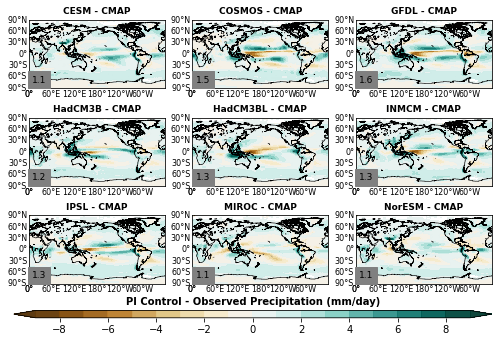

In [14]:
# Fig. S1
#fig=plt.figure(figsize=(11,6.5))
#fig=plt.figure(figsize=(8.3,11.7)) # A4
fig=plt.figure(figsize=(8.3,5.1))
#plt.subplots_adjust(left=.02, bottom=.05, right=.98, top=.88,hspace=.3,wspace=.2)
run=1
for i in range(len(mdir)):
        if np.isnan(np.nanmean(pr_picontrol[:,:,i]))==False:
            plt.subplot(3,3,run)
            ap.plot(pr_picontrol[:,:,i]-obspr, lon,lat, cmap='BrBG', clf=np.arange(-9,10,1),bar=0)
            plt.title(model_name[i]+' - CMAP',fontsize=9,fontweight='bold')
            plt.text(9,-75, np.around(piRMSE[i],decimals=1),fontsize=9,color='black',backgroundcolor='grey')
        run=run+1
cbar_ax1 = fig.add_axes([0.1, 0.05, .8, 0.02])
plt.colorbar(cax=cbar_ax1, orientation="horizontal")
plt.title('PI Control - Observed Precipitation (mm/day)',fontsize=10,fontweight='bold')
#plt.savefig("./plots/FigS1_Pr_picontrol_obs.png",dpi=300)
plt.savefig('./plots/FigS1_Pr_picontrol_obs.pdf', format='pdf')

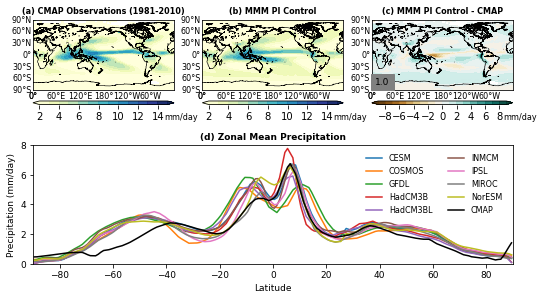

In [15]:
# Fig. 2

#fig=plt.figure(figsize=(14,8))
fig=plt.figure(figsize=(8.6,4.8)) # A
#plt.subplots_adjust(left=.02, bottom=.2, right=.98, top=.95,hspace=.3,wspace=.2)

plt.subplot(2,3,1)
ap.plot(obspr, lon,lat,cmap='YlGnBu', clf=np.arange(2,16,1))
plt.text(335,-165,s='mm/day',fontsize=8)
plt.title("(a) CMAP Observations (1981-2010)", fontsize=8,fontweight='bold')

plt.subplot(2,3,2)
ap.plot(np.nanmean(pr_picontrol,2), lon,lat, cmap='YlGnBu', clf=np.arange(2,16,1))
plt.text(335,-165,s='mm/day',fontsize=8)
plt.title("(b) MMM PI Control", fontsize=8,fontweight='bold')

plt.subplot(2,3,3)
ap.plot(np.nanmean(pr_picontrol,2)-obspr, lon,lat, cmap='BrBG', clf=np.arange(-9,10,1))
plt.title("(c) MMM PI Control - CMAP", fontsize=8,fontweight='bold')
plt.text(9,-75, np.around(MMMpiRMSE,decimals=1),fontsize=9,color='black',backgroundcolor='grey')
plt.text(335,-165,s='mm/day',fontsize=8)
# plt.savefig("Pr_picontrol_obsMMM.png",dpi=300)
# plt.savefig('Pr_picontrol_obsMMM.pdf', format='pdf')

# zonal mean
# fig=plt.figure(figsize=(11,8.5))
plt.subplot(2,1,2)
for i in range(len(model)):
    plt.plot(lat,np.nanmean(pr_picontrol[:,:,i],1))
plt.plot(lat,np.nanmean(obspr,1),color='black')
#plt.legend(model+["CMAP"])
plt.legend(model_name+["CMAP"], fontsize=8, loc='best', bbox_to_anchor=(0.68, 0.35), ncol=2, frameon=False)
    
plt.title('(d) Zonal Mean Precipitation', fontsize=9,fontweight='bold')
plt.xlabel('Latitude', fontsize=9)
plt.ylabel('Precipitation (mm/day)', fontsize=9)
plt.xlim([-90, 90])
plt.ylim([0, 8])
plt.tick_params(labelsize=9)
#plt.subplots_adjust(left = 0.05,right = 0.95,bottom = 0.08,top = 0.98,wspace = 0.1,hspace = 0.005)

#plt.savefig("./plots/Fig2_PIrunssummar.png",dpi=250)
plt.savefig('./plots/Fig2_PIrunssummar.pdf', format='pdf')

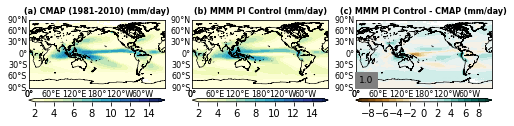

In [16]:
#fig=plt.figure(figsize=(14,4.5))
fig=plt.figure(figsize=(8.3,3)) # A4
#plt.subplots_adjust(left=.02, bottom=.2, right=.98, top=.95,hspace=.3,wspace=.2)

plt.subplot(1,3,1)
ap.plot(obspr, lon,lat,cmap='YlGnBu', clf=np.arange(2,16,1))
plt.title("(a) CMAP (1981-2010) (mm/day)", fontsize=8,fontweight='bold')

plt.subplot(1,3,2)
ap.plot(np.nanmean(pr_picontrol,2), lon,lat, cmap='YlGnBu', clf=np.arange(2,16,1))
plt.title("(b) MMM PI Control (mm/day)", fontsize=8,fontweight='bold')

plt.subplot(1,3,3)
ap.plot(np.nanmean(pr_picontrol,2)-obspr, lon,lat, cmap='BrBG', clf=np.arange(-9,10,1))
plt.title("(c) MMM PI Control - CMAP (mm/day)", fontsize=8,fontweight='bold')
plt.text(9,-75, np.around(MMMpiRMSE,decimals=1),fontsize=9,color='black',backgroundcolor='grey')

#plt.savefig("./plots/Pr_picontrol_obsMMM.png",dpi=300)
plt.savefig('./plots/Pr_picontrol_obsMMM.pdf', format='pdf')
plt.savefig('./plots/Figure2_top.pdf', format='pdf')

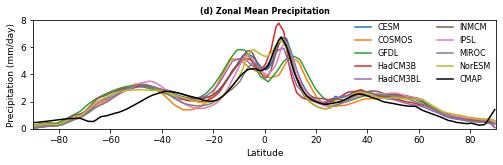

In [17]:
# zonal mean
#fig=plt.figure(figsize=(11,8.5))
fig=plt.figure(figsize=(8.3,2)) # A4
for i in range(len(model)):
    plt.plot(lat,np.nanmean(pr_picontrol[:,:,i],1))
plt.plot(lat,np.nanmean(obspr,1),color='black')
#plt.legend(model+["CMAP"])
plt.legend(model_name+["CMAP"], fontsize=8, loc='best', bbox_to_anchor=(0.68, 0.35), ncol=2, frameon=False)
   
plt.title('(d) Zonal Mean Precipitation', fontsize=8, fontweight='bold')
plt.xlabel('Latitude', fontsize=9)
plt.ylabel('Precipitation (mm/day)', fontsize=9)
plt.xlim([-90, 90])
plt.ylim([0, 8])
plt.tick_params(labelsize=9)

#plt.savefig("./plots/zonalmean_pr_picontrol.png",dpi=300)
plt.savefig('./plots/zonalmean_pr_picontrol.pdf', format='pdf')
plt.savefig('./plots/Figure2_middle.pdf', format='pdf')

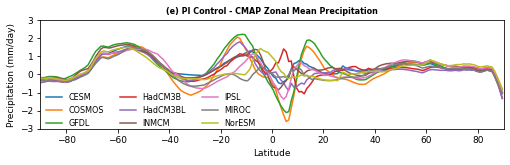

In [18]:
# zonal mean
#fig=plt.figure(figsize=(11,8.5))
fig=plt.figure(figsize=(8.3,2)) # A4
for i in range(len(model)):
    plt.plot(lat,np.nanmean(pr_picontrol[:,:,i]-obspr,1),)
#plt.legend(model+["CMAP"])
plt.legend(model_name, fontsize=8, loc='best', bbox_to_anchor=(0.48, 0.4), ncol=3, frameon=False)
   
plt.title('(e) PI Control - CMAP Zonal Mean Precipitation', fontsize=8, fontweight='bold')
plt.xlabel('Latitude', fontsize=9)
plt.ylabel('Precipitation (mm/day)', fontsize=9)
plt.xlim([-90, 90])
plt.ylim([-3, 3])
plt.tick_params(labelsize=9)

#plt.savefig("./plots/zonalmean_pr_picontrol.png",dpi=300)
plt.savefig('./plots/zonalmean_pr_picontrol.pdf', format='pdf')
plt.savefig('./plots/Figure2_bottom.pdf', format='pdf')

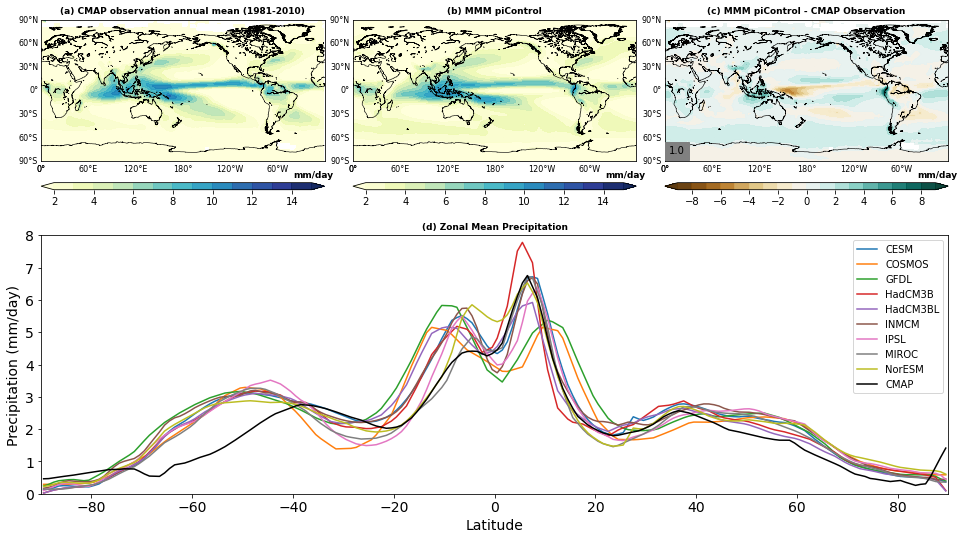

In [19]:
# Old version of Fig. 2

fig=plt.figure(figsize=(14,8))
#plt.subplots_adjust(left=.02, bottom=.2, right=.98, top=.95,hspace=.3,wspace=.2)

plt.subplot(2,3,1)
ap.plot(obspr, lon,lat,cmap='YlGnBu', clf=np.arange(2,16,1))
plt.text(320,-110,s='mm/day',fontsize=9,fontweight='bold')
plt.title("(a) CMAP observation annual mean (1981-2010)", fontsize=9,fontweight='bold')

plt.subplot(2,3,2)
ap.plot(np.nanmean(pr_picontrol,2), lon,lat, cmap='YlGnBu', clf=np.arange(2,16,1))
plt.text(320,-110,s='mm/day',fontsize=9,fontweight='bold')
plt.title("(b) MMM piControl", fontsize=9,fontweight='bold')

plt.subplot(2,3,3)
ap.plot(np.nanmean(pr_picontrol,2)-obspr, lon,lat, cmap='BrBG', clf=np.arange(-9,10,1))
plt.title("(c) MMM piControl - CMAP Observation", fontsize=9,fontweight='bold')
plt.text(5,-80, np.around(MMMpiRMSE,decimals=1),fontsize=10,color='black',backgroundcolor='grey')
plt.text(320,-110,s='mm/day',fontsize=9,fontweight='bold')
# plt.savefig("Pr_picontrol_obsMMM.png",dpi=300)
# plt.savefig('Pr_picontrol_obsMMM.pdf', format='pdf')

# zonal mean
# fig=plt.figure(figsize=(11,8.5))
plt.subplot(2,1,2)
for i in range(len(model)):
    plt.plot(lat,np.nanmean(pr_picontrol[:,:,i],1))
plt.plot(lat,np.nanmean(obspr,1),color='black')
#plt.legend(model+["CMAP"])
plt.legend(model_name+["CMAP"])

    
plt.title('(d) Zonal Mean Precipitation', fontsize=9,fontweight='bold')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Precipitation (mm/day)', fontsize=14)
plt.xlim([-90, 90])
plt.ylim([0, 8])
plt.tick_params(labelsize=14)
plt.subplots_adjust(left = 0.05,right = 0.95,bottom = 0.08,top = 0.98,wspace = 0.1,hspace = 0.005)

## Model-Model Analysis Plots

In [20]:
# Create anomalie matrix (ano from PI control)
tsanom=np.zeros((len(lat),len(lon),len(model),len(proj)-1))
for p in range(len(proj)-1):
    tsanom[:,:,:,p]=ts[:,:,:,p+1]-ts[:,:,:,0]

pranom=np.zeros((len(lat),len(lon),len(model),len(proj)-1))
for p in range(len(proj)-1):
    pranom[:,:,:,p]=pr[:,:,:,p+1]-pr[:,:,:,0]

evanom=np.zeros((len(lat),len(lon),len(model),len(proj)-1))
for p in range(len(proj)-1):
    evanom[:,:,:,p]=ev[:,:,:,p+1]-ev[:,:,:,0]

peanom=np.zeros((len(lat),len(lon),len(model),len(proj)-1))
for p in range(len(proj)-1):
    peanom[:,:,:,p]=pe[:,:,:,p+1]-pe[:,:,:,0]


In [21]:
## Multi model mean plot

prMMM=np.nanmean(pr[:,:,:,1:7],2)
tsMMM=np.nanmean(ts[:,:,:,1:7],2)
peMMM=np.nanmean(pe[:,:,:,1:7],2)

pranoMMM=np.nanmean(pranom,2)
tsanoMMM=np.nanmean(tsanom,2)
peanoMMM=np.nanmean(peanom,2)

pranoMMM_std=np.nanstd(pranom,2)
tsanoMMM_std=np.nanstd(tsanom,2)
peanoMMM_std=np.nanstd(peanom,2)

In [22]:
# Create zonal means
tszonal=np.nanmean(ts,1)-273.15 #Converting from K to C
tsanozonal=np.nanmean(tsanom,1)

przonal=np.nanmean(pr,1)
pranozonal=np.nanmean(pranom,1)

evzonal=np.nanmean(ev,1)
evanozonal=np.nanmean(evanom,1)

pezonal=np.nanmean(pe,1)
peanozonal=np.nanmean(peanom,1)

In [23]:
#Get weights for averaging

Tlat=np.nonzero((lat>=-15)&(lat<=15))[0]
Slat=np.nonzero((lat>=-30)&(lat<=-15))[0]
Nlat=np.nonzero((lat>=15)&(lat<=30))[0]

SMlat=np.nonzero((lat>=-60)&(lat<=-30))[0]
NMlat=np.nonzero((lat>=30)&(lat<=60))[0]

SPlat=np.nonzero((lat>=-90)&(lat<=-60))[0]
NPlat=np.nonzero((lat>=60)&(lat<=90))[0]

Tal = np.deg2rad(lat[Tlat]); Tweight = np.cos(Tal)
Sal = np.deg2rad(lat[Slat]); Sweight = np.cos(Sal)
Nal = np.deg2rad(lat[Nlat]); Nweight = np.cos(Nal)

SMal = np.deg2rad(lat[SMlat]); SMweight = np.cos(SMal)
NMal = np.deg2rad(lat[NMlat]); NMweight = np.cos(NMal)

SPal = np.deg2rad(lat[SPlat]); SPweight = np.cos(SPal)
NPal = np.deg2rad(lat[NPlat]); NPweight = np.cos(NPal)

Gal = np.deg2rad(lat); Gweight = np.cos(Gal)

In [24]:
#P-E
Gpe=np.average(peanozonal, axis=0, weights=Gweight)

Tpe=np.ma.average(peanozonal[Tlat,:,:], axis=0, weights=Tweight)
Speanom=np.ma.average(peanozonal[Slat,:,:], axis=0, weights=Sweight)
Npeanom=np.ma.average(peanozonal[Nlat,:,:], axis=0, weights=Nweight)

SMpeanom=np.ma.average(peanozonal[SMlat,:,:], axis=0, weights=SMweight)
NMpeanom=np.ma.average(peanozonal[NMlat,:,:], axis=0, weights=NMweight)

SPpeanom=np.ma.average(peanozonal[SPlat,:,:], axis=0, weights=SPweight)
NPpeanom=np.ma.average(peanozonal[NPlat,:,:], axis=0, weights=NPweight)

subpe=(Speanom+Npeanom)/2
Mpe=(SMpeanom+NMpeanom)/2
Ppe=(SPpeanom+NPpeanom)/2

In [25]:
#Pr
Gpr=np.average(pranozonal, axis=0, weights=Gweight)

Tpr=np.ma.average(pranozonal[Tlat,:,:], axis=0, weights=Tweight)
Spranom=np.ma.average(pranozonal[Slat,:,:], axis=0, weights=Sweight)
Npranom=np.ma.average(pranozonal[Nlat,:,:], axis=0, weights=Nweight)

SMpranom=np.ma.average(pranozonal[SMlat,:,:], axis=0, weights=SMweight)
NMpranom=np.ma.average(pranozonal[NMlat,:,:], axis=0, weights=NMweight)

SPpranom=np.ma.average(pranozonal[SPlat,:,:], axis=0, weights=SPweight)
NPpranom=np.ma.average(pranozonal[NPlat,:,:], axis=0, weights=NPweight)

subpr=(Spranom+Npranom)/2
Mpr=(SMpranom+NMpranom)/2
Ppr=(SPpranom+NPpranom)/2

# Get abs (rather than ano) global mean precip 
Gpr_abs=np.average(przonal, axis=0, weights=Gweight)

Tpr_abs=np.ma.average(przonal[Tlat,:,:], axis=0, weights=Tweight)
Spr_abs=np.ma.average(przonal[Slat,:,:], axis=0, weights=Sweight)
Npr_abs=np.ma.average(przonal[Nlat,:,:], axis=0, weights=Nweight)

SMpr_abs=np.ma.average(przonal[SMlat,:,:], axis=0, weights=SMweight)
NMpr_abs=np.ma.average(przonal[NMlat,:,:], axis=0, weights=NMweight)

SPpr_abs=np.ma.average(przonal[SPlat,:,:], axis=0, weights=SPweight)
NPpr_abs=np.ma.average(przonal[NPlat,:,:], axis=0, weights=NPweight)

subpr_abs=(Spr_abs+Npr_abs)/2
Mpr_abs=(SMpr_abs+NMpr_abs)/2
Ppr_abs=(SPpr_abs+NPpr_abs)/2

In [26]:
#TS
GTs=np.average(tsanozonal, axis=0, weights=Gweight)

Tts=np.ma.average(tsanozonal[Tlat,:,:], axis=0, weights=Tweight)
Stsanom=np.ma.average(tsanozonal[Slat,:,:], axis=0, weights=Sweight)
Ntsanom=np.ma.average(tsanozonal[Nlat,:,:], axis=0, weights=Nweight)

SMtsanom=np.ma.average(tsanozonal[SMlat,:,:], axis=0, weights=SMweight)
NMtsanom=np.ma.average(tsanozonal[NMlat,:,:], axis=0, weights=NMweight)

SPtsanom=np.ma.average(tsanozonal[SPlat,:,:], axis=0, weights=SPweight)
NPtsanom=np.ma.average(tsanozonal[NPlat,:,:], axis=0, weights=NPweight)

subts=(Stsanom+Ntsanom)/2
Mts=(SMtsanom+NMtsanom)/2
Pts=(SPtsanom+NPtsanom)/2

# Get abs (rather than ano) global mean precip 
Gts_abs=np.average(tszonal, axis=0, weights=Gweight)

**Plot Multi Panel Lat-Lon Plots**

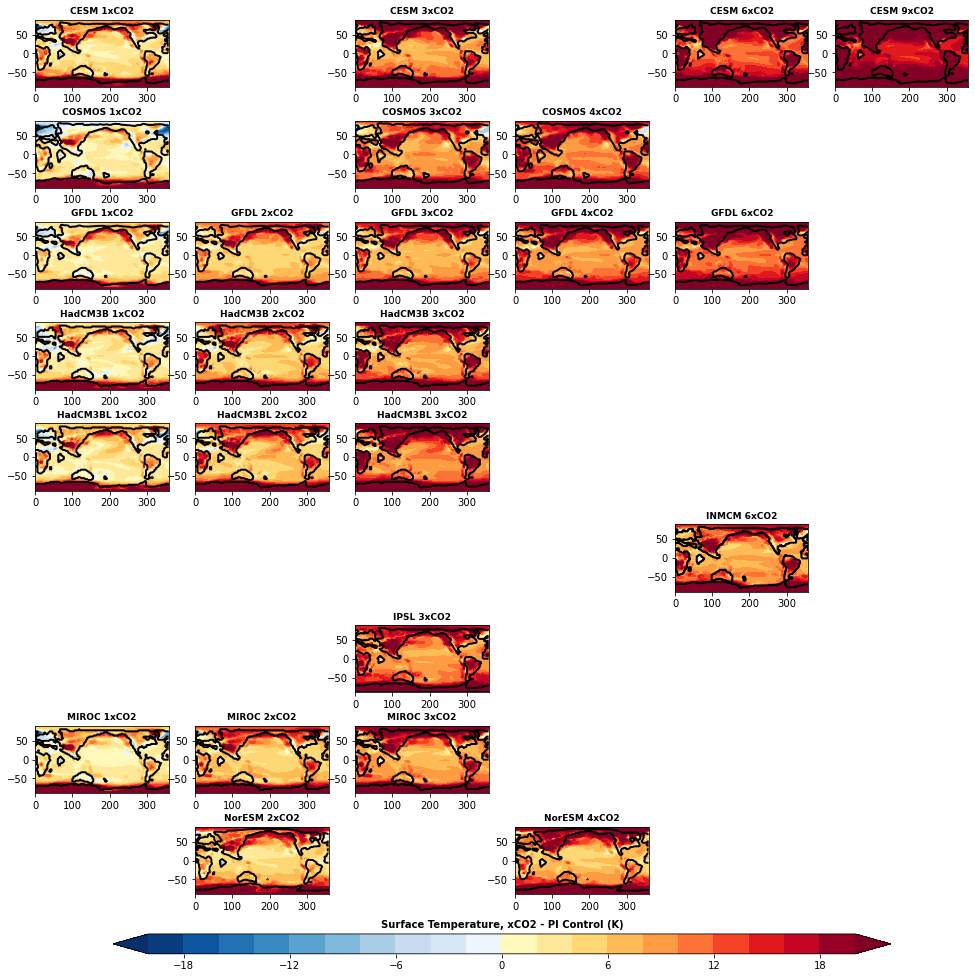

In [27]:
# Make multi panel temperature plot
fig=plt.figure(figsize=(13.5,13.8))
plt.subplots_adjust(left=.02, bottom=.1, right=.98, top=.98,hspace=.5,wspace=.2)
run=1
for i in range(len(mdir)):
    for j in range(len(proj)-1):
        if np.isnan(np.nanmean(ts[:,:,i,j+1]))==False:
            plt.subplot(9,6,run)
            #print(np.nanmean(matrix[:,:,i,j+1]))
            #ap.plot(matrix[:,:,i,j+1]-matrix[:,:,i,0],lon,lat,clf=np.arange(-25,26,5),bar=0,cmap=ap.cmap())
            cs=plt.contourf(lon,lat,ts[:,:,i,j+1]-ts[:,:,i,0], cmap=ap.cmap(), extend='both', levels=np.arange(-20,20+1, 2))
            #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
            plt.contour(lon,lat,sftlf[:,:,i,j+1], levels=[0.5], colors='black', linewidths=2)
            plt.title(model_name[i]+' '+proj[j+1][-5:],fontsize=9,fontweight='bold')
        run=run+1
cbar_ax1 = fig.add_axes([0.1, 0.04, .8, 0.02])
plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
plt.title('Surface Temperature, xCO2 - PI Control (K)',fontsize=10,fontweight='bold')
#plt.savefig('./plots/FigS2_tsanofinal.png',dpi=300)
plt.savefig('./plots/FigS2_tsanofinal.pdf', format='pdf')
proj_ts=['piControl','1xCO2 (n=6)','2xCO2 (n=5)','3xCO2 (n=7)','4xCO2 (n=3)',\
      '6xCO2 (n=3)','9xCO2 (n=1)']

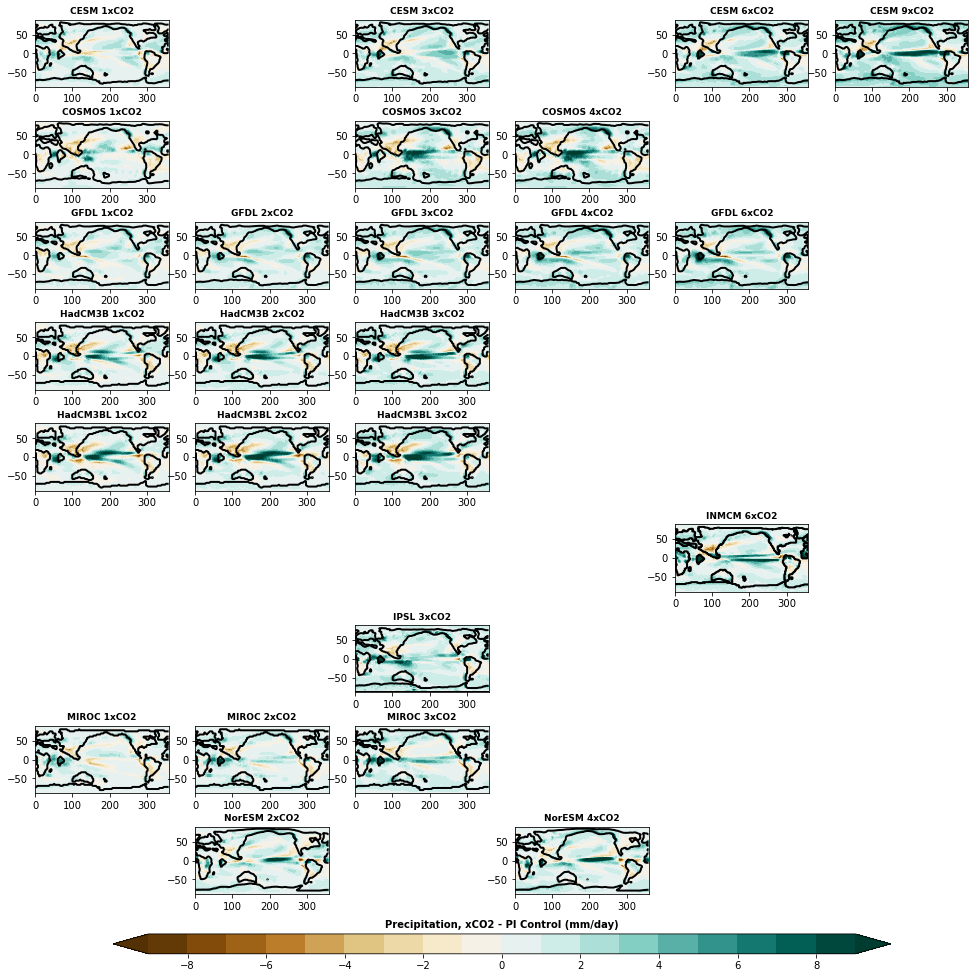

In [28]:
# Make multi panel precip plot
fig=plt.figure(figsize=(13.5,13.8))
plt.subplots_adjust(left=.02, bottom=.1, right=.98, top=.98,hspace=.5,wspace=.2)
run=1
for i in range(len(mdir)):
    for j in range(len(proj)-1):
        if np.isnan(np.nanmean(pr[:,:,i,j+1]))==False:
            plt.subplot(9,6,run)
            cs=plt.contourf(lon,lat,pr[:,:,i,j+1]-pr[:,:,i,0], extend='both', cmap='BrBG', levels=np.arange(-9,10,1))
            #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
            plt.contour(lon,lat,sftlf[:,:,i,j+1], levels=[0.5], colors='black', linewidths=2)
            plt.title(model_name[i]+' '+proj[j+1][-5:],fontsize=9,fontweight='bold')
        run=run+1
cbar_ax1 = fig.add_axes([0.1, 0.04, .8, 0.02])
plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
plt.title('Precipitation, xCO2 - PI Control (mm/day)',fontsize=10,fontweight='bold')
#plt.savefig('./plots/FigS3_pranofinal.png',dpi=300)
plt.savefig('./plots/FigS3_pranofinal.pdf', format='pdf')
proj_pr=['piControl','1xCO2 (n=6)','2xCO2 (n=5)','3xCO2 (n=7)','4xCO2 (n=3)',\
      '6xCO2 (n=3)','9xCO2 (n=1)']

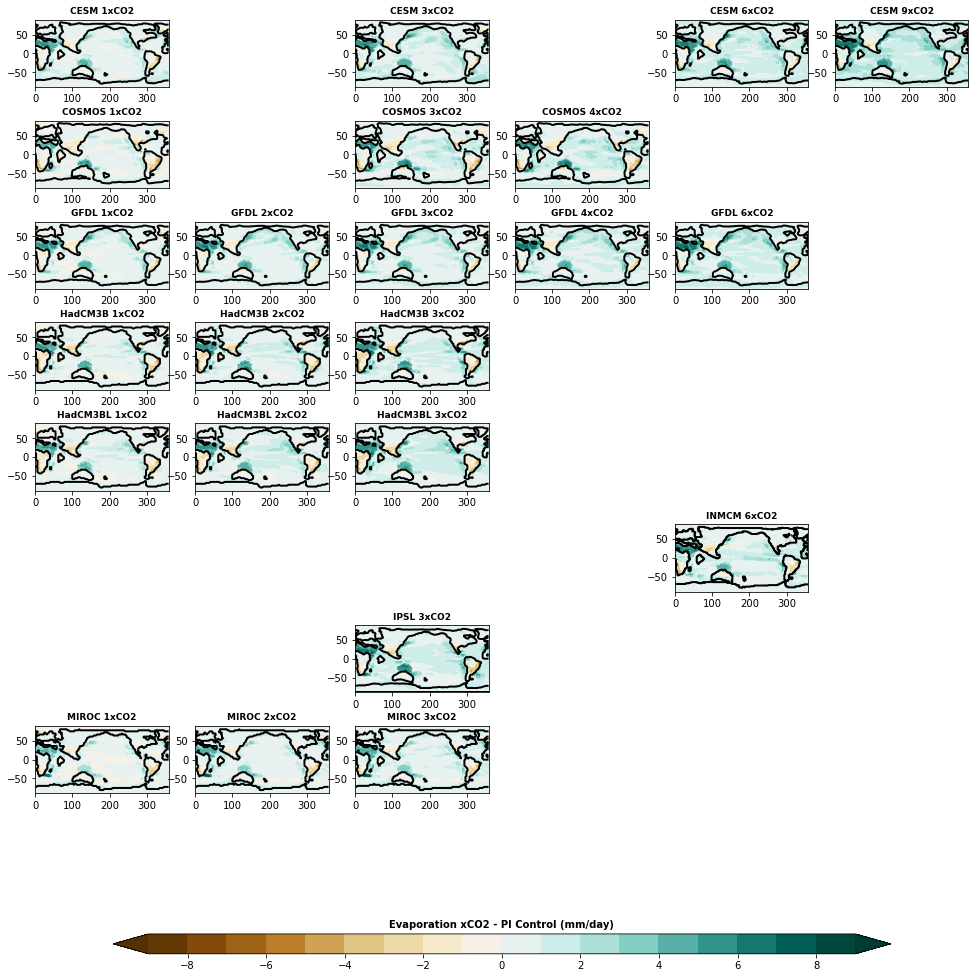

In [29]:
# Make multi panel evap plot
fig=plt.figure(figsize=(13.5,13.8))
plt.subplots_adjust(left=.02, bottom=.1, right=.98, top=.98,hspace=.5,wspace=.2)
run=1
for i in range(len(mdir)):
    for j in range(len(proj)-1):
        if np.isnan(np.nanmean(ev[:,:,i,j+1]))==False:
            plt.subplot(9,6,run)
            cs=plt.contourf(lon,lat,ev[:,:,i,j+1]-ev[:,:,i,0], extend='both', cmap='BrBG', levels=np.arange(-9,10,1))
            #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
            plt.contour(lon,lat,sftlf[:,:,i,j+1], levels=[0.5], colors='black', linewidths=2)
            plt.title(model_name[i]+' '+proj[j+1][-5:],fontsize=9,fontweight='bold')
        run=run+1
cbar_ax1 = fig.add_axes([0.1, 0.04, .8, 0.02])
plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
plt.title('Evaporation xCO2 - PI Control (mm/day)',fontsize=10,fontweight='bold')
#plt.savefig('./plots/FigS4_evanofinal.png',dpi=300)
plt.savefig('./plots/FigS4_evanofinal.pdf', format='pdf')
proj_ev=['piControl','1xCO2 (n=6)','2xCO2 (n=4)','3xCO2 (n=7)','4xCO2 (n=2)',\
      '6xCO2 (n=3)','9xCO2 (n=1)']

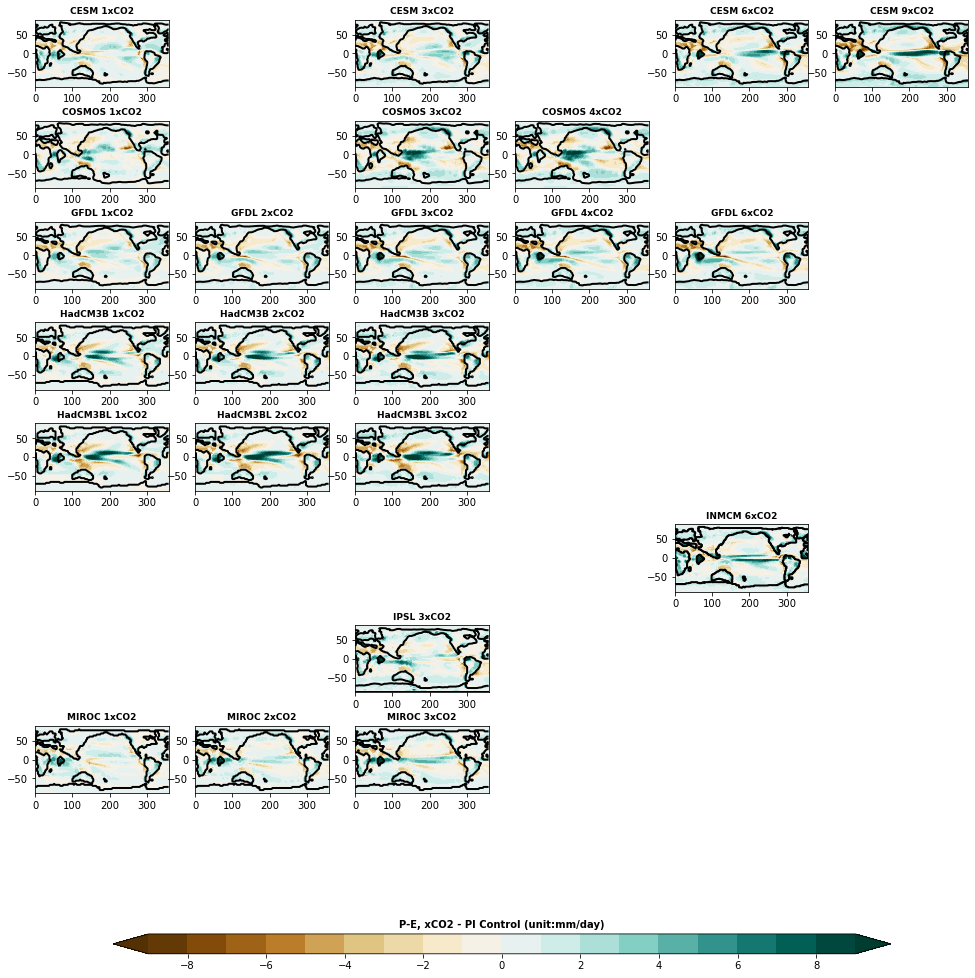

In [30]:
# Make multi panel P-E plot
fig=plt.figure(figsize=(13.5,13.8))
plt.subplots_adjust(left=.02, bottom=.1, right=.98, top=.98,hspace=.5,wspace=.2)
run=1
for i in range(len(mdir)):
    for j in range(len(proj)-1):
        if np.isnan(np.nanmean(pe[:,:,i,j+1]))==False:
            plt.subplot(9,6,run)
            cs=plt.contourf(lon,lat,pe[:,:,i,j+1]-pe[:,:,i,0], extend='both', cmap='BrBG', levels=np.arange(-9,10,1))
            #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
            plt.contour(lon,lat,sftlf[:,:,i,j+1], levels=[0.5], colors='black', linewidths=2)
            plt.title(model_name[i]+' '+proj[j+1][-5:],fontsize=9,fontweight='bold')
        run=run+1
cbar_ax1 = fig.add_axes([0.1, 0.04, .8, 0.02])
plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
plt.title('P-E, xCO2 - PI Control (unit:mm/day)',fontsize=10,fontweight='bold')
#plt.savefig('./plots/FigS5_pefinal.png',dpi=300)
plt.savefig('./plots/FigS5_peanofinal.pdf', format='pdf')
proj_pe=['piControl','1xCO2 (n=6)','2xCO2 (n=4)','3xCO2 (n=7)','4xCO2 (n=2)',\
      '6xCO2 (n=3)','9xCO2 (n=1)']

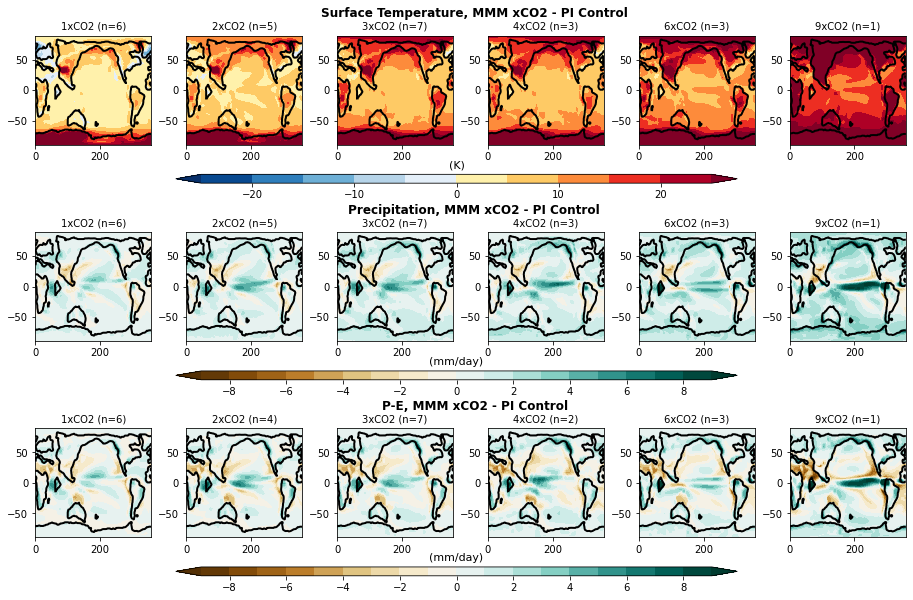

In [31]:
#PranoMMM

fig=plt.figure(figsize=(13,8.2))
plt.subplots_adjust(left=.05, bottom=.1, right=.98, top=.95,hspace=.8,wspace=.3)
run=1
for j in range(len(proj)-1):
    plt.subplot(3,6,run)
    cs=plt.contourf(lon,lat,tsanoMMM[:,:,j], extend='both', cmap=ap.cmap(), levels=np.arange(-25,26,5))
    #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
    plt.contour(lon,lat,sftlf[:,:,0,1], levels=[0.5], colors='black', linewidths=2)
    #plt.title('MMM '+proj[j+1][-5:],fontsize=9,fontweight='bold')
    plt.title(proj_ts[j+1][:],fontsize=10)
    run=run+1

plt.text(-1450,120,s='Surface Temperature, MMM xCO2 - PI Control',fontsize=12,fontweight='bold')

cbar_ax1 = fig.add_axes([0.2, 0.7, .6, 0.015])
plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
plt.title('(K)',fontsize=11)


run=7
for j in range(len(proj)-1):
    plt.subplot(3,6,run)
    cs=plt.contourf(lon,lat,pranoMMM[:,:,j], extend='both', cmap='BrBG', levels=np.arange(-9,10,1))
    #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
    plt.contour(lon,lat,sftlf[:,:,0,1], levels=[0.5], colors='black', linewidths=2)
    #plt.title('MMM '+proj[j+1][-5:],fontsize=9,fontweight='bold')
    plt.title(proj_pr[j+1][:],fontsize=10)
    run=run+1
    
plt.text(-1365,120,s='Precipitation, MMM xCO2 - PI Control',fontsize=12,fontweight='bold')

cbar_ax2 = fig.add_axes([0.2, 0.367, .6, 0.015])
plt.colorbar(cs,cax=cbar_ax2, orientation="horizontal")
plt.title('(mm/day)',fontsize=11)


run=13
for j in range(len(proj)-1):
    plt.subplot(3,6,run)
    cs=plt.contourf(lon,lat,peanoMMM[:,:,j], extend='both', cmap='BrBG', levels=np.arange(-9,10,1))
    #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
    plt.contour(lon,lat,sftlf[:,:,0,1], levels=[0.5], colors='black', linewidths=2)
    #plt.title('MMM '+proj[j+1][-5:],fontsize=9,fontweight='bold')
    plt.title(proj_pe[j+1][:],fontsize=10)
    run=run+1
    
plt.text(-1260,120,s='P-E, MMM xCO2 - PI Control',fontsize=12,fontweight='bold')

cbar_ax3 = fig.add_axes([0.2, 0.035, .6, 0.015])
plt.colorbar(cs,cax=cbar_ax3, orientation="horizontal")
plt.title('(mm/day)',fontsize=11)

#plt.savefig("./plots/Fig4_MMM_ts_pr_pe.png",dpi=300)
plt.savefig('./plots/Fig4_MMM_ts_pr_pe.pdf', format='pdf')

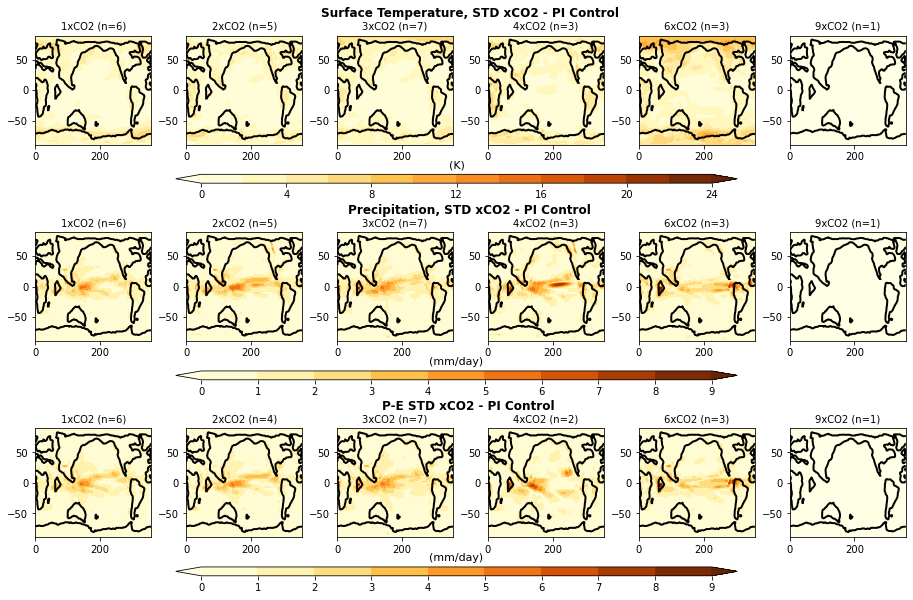

In [32]:
#PranoMMM_std

#fig=plt.figure(figsize=(13,9))
fig=plt.figure(figsize=(13,8.2))
plt.subplots_adjust(left=.05, bottom=.1, right=.98, top=.95,hspace=.8,wspace=.3)
run=1
for j in range(len(proj)-1):
    plt.subplot(3,6,run)
    cs=plt.contourf(lon,lat,tsanoMMM_std[:,:,j], extend='both', cmap='YlOrBr', levels=np.arange(0,26,2))
    #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
    plt.contour(lon,lat,sftlf[:,:,0,1], levels=[0.5], colors='black', linewidths=2)
    #plt.title('MMM '+proj[j+1][-5:],fontsize=9,fontweight='bold')
    plt.title(proj_ts[j+1][:],fontsize=10)
    run=run+1

plt.text(-1450,120,s='Surface Temperature, STD xCO2 - PI Control',fontsize=12,fontweight='bold')

cbar_ax1 = fig.add_axes([0.2, 0.7, .6, 0.015])
plt.colorbar(cs,cax=cbar_ax1, orientation="horizontal")
plt.title('(K)',fontsize=11)


run=7
for j in range(len(proj)-1):
    plt.subplot(3,6,run)
    cs=plt.contourf(lon,lat,pranoMMM_std[:,:,j], extend='both', cmap='YlOrBr', levels=np.arange(0,10,1))
    #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
    plt.contour(lon,lat,sftlf[:,:,0,1], levels=[0.5], colors='black', linewidths=2)
    #plt.title('MMM '+proj[j+1][-5:],fontsize=9,fontweight='bold')
    plt.title(proj_pr[j+1][:],fontsize=10)
    run=run+1

plt.text(-1365,120,s='Precipitation, STD xCO2 - PI Control',fontsize=12,fontweight='bold')

cbar_ax2 = fig.add_axes([0.2, 0.367, .6, 0.015])
plt.colorbar(cs,cax=cbar_ax2, orientation="horizontal")
plt.title('(mm/day)',fontsize=11)

run=13
for j in range(len(proj)-1):
    plt.subplot(3,6,run)
    cs=plt.contourf(lon,lat,peanoMMM_std[:,:,j], extend='both', cmap='YlOrBr', levels=np.arange(0,10,1))
    #plt.contour(submap.lon,submap.lat,submap.sftlf[0,:,:], colors='black', linewidths=0.5)
    plt.contour(lon,lat,sftlf[:,:,0,1], levels=[0.5], colors='black', linewidths=2)
    #plt.title('MMM '+proj[j+1][-5:],fontsize=9,fontweight='bold')
    plt.title(proj_pe[j+1][:],fontsize=10)
    run=run+1

plt.text(-1260,120,s='P-E STD xCO2 - PI Control',fontsize=12,fontweight='bold')

cbar_ax3 = fig.add_axes([0.2, 0.035, .6, 0.015])
plt.colorbar(cs,cax=cbar_ax3, orientation="horizontal")
plt.title('(mm/day)',fontsize=11)

plt.savefig("./plots/FigS6new_MMM_std_ts_pr_pe.png",dpi=300)
plt.savefig('./plots/FigS6new_MMM_std_ts_pr_pe.pdf', format='pdf')

**Plot Zonal Means**

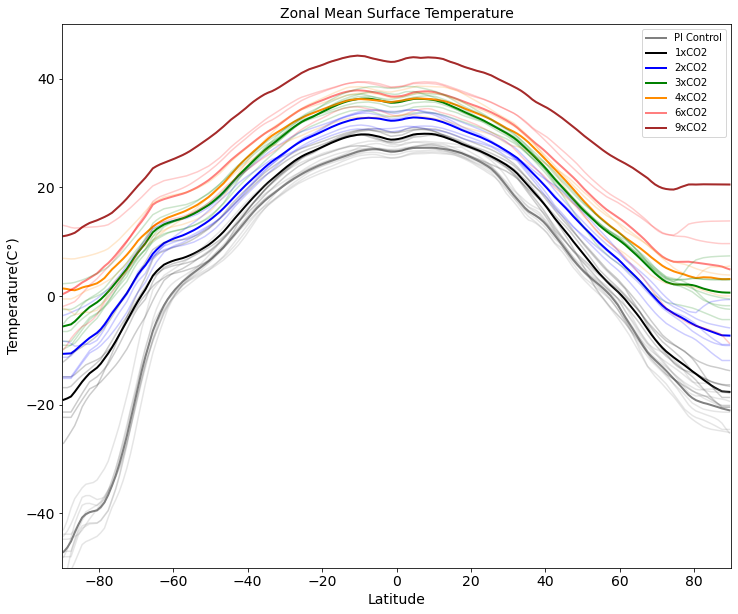

In [33]:
# Plot zonal mean surface temperature
plt.figure(figsize=(12,10))

plt.plot(lat,np.nanmean(tszonal[:,:,0],1), color='gray', label='PI Control',linewidth=2.0);
plt.plot(lat,np.nanmean(tszonal[:,:,1],1), color='black', label='1xCO2',linewidth=2.0);
plt.plot(lat,np.nanmean(tszonal[:,:,2],1), color='blue', label='2xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(tszonal[:,:,3],1), color='green', label='3xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(tszonal[:,:,4],1), color='darkorange',label='4xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(tszonal[:,:,5],1), color='red',label='6xCO2', alpha=.5,linewidth=2.0)
plt.plot(lat,np.nanmean(tszonal[:,:,6],1), color='brown', label='9xCO2',linewidth=2.0)
    
plt.title('Zonal Mean Surface Temperature', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Temperature(C°)', fontsize=14)
#plt.legend(proj_name[0:])
plt.legend()
plt.xlim([-90, 90])
plt.ylim([-50, 50])
plt.tick_params(labelsize=14)


for i in range(len(model)):
    plt.plot(lat,tszonal[:,i,0], color='gray', label='PI', alpha=.2);
    plt.plot(lat,tszonal[:,i,1], color='black', label='1xCO2', alpha=.2);
    plt.plot(lat,tszonal[:,i,2], color='blue', label='2xCO2', alpha=.2)
    plt.plot(lat,tszonal[:,i,3], color='green', label='3xCO2', alpha=.2)
    plt.plot(lat,tszonal[:,i,4], color='darkorange',label='4xCO2', alpha=.2)
    plt.plot(lat,tszonal[:,i,5], color='red',label='6xCO2', alpha=.2)
    plt.plot(lat,tszonal[:,i,6], color='brown', label='9xCO2', alpha=.2)
    
#plt.savefig('./plots/tszonal.png',dpi=300)
plt.savefig('./plots/tszonal.pdf', format='pdf')

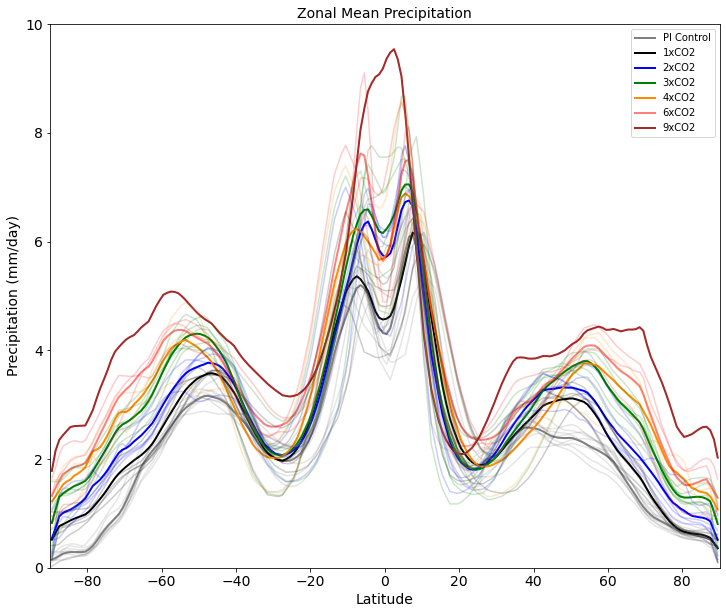

In [34]:
# Plot zonal mean precip
plt.figure(figsize=(12,10))

plt.plot(lat,np.nanmean(przonal[:,:,0],1), color='gray', label='PI Control',linewidth=2.0);
plt.plot(lat,np.nanmean(przonal[:,:,1],1), color='black', label='1xCO2',linewidth=2.0);
plt.plot(lat,np.nanmean(przonal[:,:,2],1), color='blue', label='2xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(przonal[:,:,3],1), color='green', label='3xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(przonal[:,:,4],1), color='darkorange',label='4xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(przonal[:,:,5],1), color='red',label='6xCO2', alpha=.5,linewidth=2.0)
plt.plot(lat,np.nanmean(przonal[:,:,6],1), color='brown', label='9xCO2',linewidth=2.0)
    
plt.title('Zonal Mean Precipitation', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Precipitation (mm/day)', fontsize=14)
#plt.legend(proj_name[1:])
plt.legend()
plt.xlim([-90, 90])
plt.ylim([0, 10])
plt.tick_params(labelsize=14)

for i in range(len(model)):
    plt.plot(lat,przonal[:,i,0], color='gray', label='PI', alpha=.2);
    plt.plot(lat,przonal[:,i,1], color='black', label='1xCO2', alpha=.2);
    plt.plot(lat,przonal[:,i,2], color='blue', label='2xCO2', alpha=.2)
    plt.plot(lat,przonal[:,i,3], color='green', label='3xCO2', alpha=.2)
    plt.plot(lat,przonal[:,i,4], color='darkorange',label='4xCO2', alpha=.2)
    plt.plot(lat,przonal[:,i,5], color='red',label='6xCO2', alpha=.2)
    plt.plot(lat,przonal[:,i,6], color='brown', label='9xCO2', alpha=.2)
     
    
#plt.savefig('./plots/przonal.png',dpi=300)
plt.savefig('./plots/przonal.pdf', format='pdf')

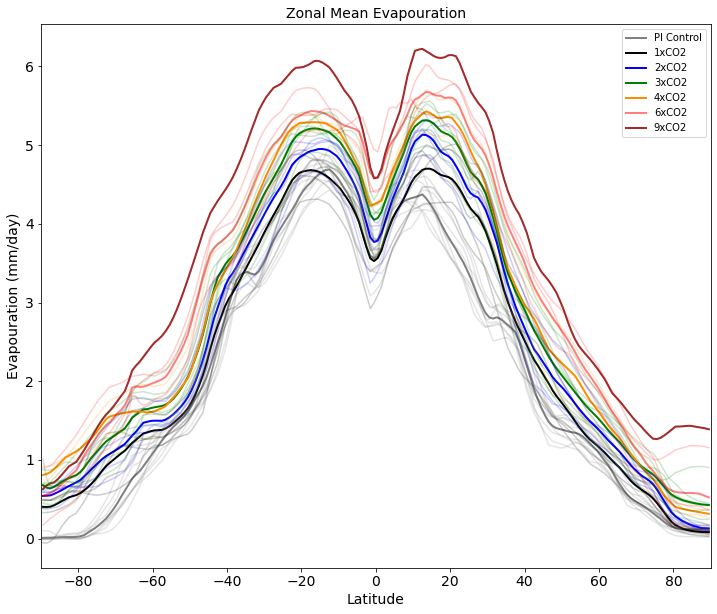

In [35]:
# Plot zonal mean evap
plt.figure(figsize=(12,10))

plt.plot(lat,np.nanmean(evzonal[:,:,0],1), color='gray', label='PI Control',linewidth=2.0);
plt.plot(lat,np.nanmean(evzonal[:,:,1],1), color='black', label='1xCO2',linewidth=2.0);
plt.plot(lat,np.nanmean(evzonal[:,:,2],1), color='blue', label='2xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(evzonal[:,:,3],1), color='green', label='3xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(evzonal[:,:,4],1), color='darkorange',label='4xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(evzonal[:,:,5],1), color='red',label='6xCO2', alpha=.5,linewidth=2.0)
plt.plot(lat,np.nanmean(evzonal[:,:,6],1), color='brown', label='9xCO2',linewidth=2.0)
    
plt.title('Zonal Mean Evapouration', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Evapouration (mm/day)', fontsize=14)
#plt.legend(proj_name[1:])
plt.legend()
plt.xlim([-90, 90])
#plt.ylim([0, 7])
plt.tick_params(labelsize=14)

for i in range(len(model)):
    plt.plot(lat,evzonal[:,i,0], color='gray', label='PI', alpha=.2);
    plt.plot(lat,evzonal[:,i,1], color='black', label='1xCO2', alpha=.2);
    plt.plot(lat,evzonal[:,i,2], color='blue', label='2xCO2', alpha=.2)
    plt.plot(lat,evzonal[:,i,3], color='green', label='3xCO2', alpha=.2)
    plt.plot(lat,evzonal[:,i,4], color='darkorange',label='4xCO2', alpha=.2)
    plt.plot(lat,evzonal[:,i,5], color='red',label='6xCO2', alpha=.2)
    plt.plot(lat,evzonal[:,i,6], color='brown', label='9xCO2', alpha=.2)
     
    
#plt.savefig('./plots/evzonal.png',dpi=300)
plt.savefig('./plots/evzonal.pdf', format='pdf')

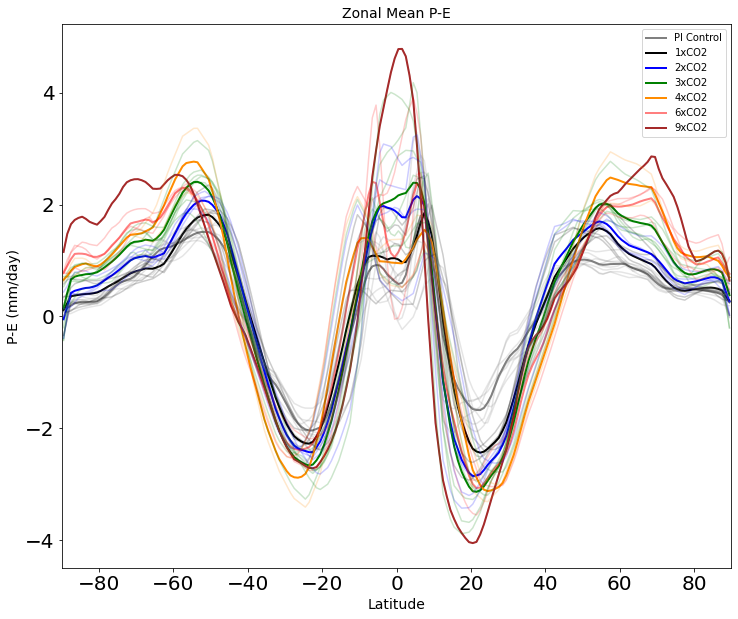

In [36]:
# Plot zonal mean P-E
plt.figure(figsize=(12,10))

plt.plot(lat,np.nanmean(pezonal[:,:,0],1), color='gray', label='PI Control',linewidth=2.0);
plt.plot(lat,np.nanmean(pezonal[:,:,1],1), color='black', label='1xCO2',linewidth=2.0);
plt.plot(lat,np.nanmean(pezonal[:,:,2],1), color='blue', label='2xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(pezonal[:,:,3],1), color='green', label='3xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(pezonal[:,:,4],1), color='darkorange',label='4xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(pezonal[:,:,5],1), color='red',label='6xCO2', alpha=.5,linewidth=2.0)
plt.plot(lat,np.nanmean(pezonal[:,:,6],1), color='brown', label='9xCO2',linewidth=2.0)
    
plt.title('Zonal Mean P-E', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('P-E (mm/day)', fontsize=14)
#plt.legend(proj_name[1:])
plt.legend()
plt.xlim([-90, 90])
#plt.ylim([-50, 50])
plt.tick_params(labelsize=20)


for i in range(len(model)):
    plt.plot(lat,pezonal[:,i,0], color='gray', label='PI', alpha=.2);
    plt.plot(lat,pezonal[:,i,1], color='black', label='1xCO2', alpha=.2);
    plt.plot(lat,pezonal[:,i,2], color='blue', label='2xCO2', alpha=.2)
    plt.plot(lat,pezonal[:,i,3], color='green', label='3xCO2', alpha=.2)
    plt.plot(lat,pezonal[:,i,4], color='darkorange',label='4xCO2', alpha=.2)
    plt.plot(lat,pezonal[:,i,5], color='red',label='6xCO2', alpha=.2)
    plt.plot(lat,pezonal[:,i,6], color='brown', label='9xCO2', alpha=.2)
    
#plt.savefig('./plots/pezonal.png',dpi=300)
plt.savefig('./plots/pezonal.pdf', format='pdf')

**Plot Zonal Mean Anomalies**

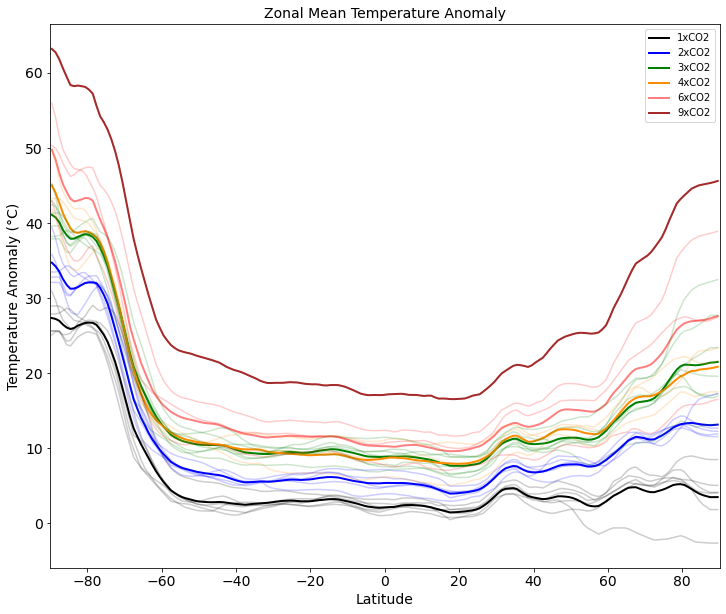

In [37]:
# Plot zonal mean surface temperature anomalies
plt.figure(figsize=(12,10))

plt.plot(lat,np.nanmean(tsanozonal[:,:,0],1), color='black', label='1xCO2', linewidth=2.0);
plt.plot(lat,np.nanmean(tsanozonal[:,:,1],1), color='blue', label='2xCO2', linewidth=2.0)
plt.plot(lat,np.nanmean(tsanozonal[:,:,2],1), color='green', label='3xCO2', linewidth=2.0)
plt.plot(lat,np.nanmean(tsanozonal[:,:,3],1), color='darkorange', label='4xCO2', linewidth=2.0)
plt.plot(lat,np.nanmean(tsanozonal[:,:,4],1), color='red', label='6xCO2', alpha=.5, linewidth=2.0)
plt.plot(lat,np.nanmean(tsanozonal[:,:,5],1), color='brown', label='9xCO2', linewidth=2.0)
    
plt.title('Zonal Mean Temperature Anomaly', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Temperature Anomaly (°C)', fontsize=14)
#plt.legend(proj_name[1:])
plt.legend()
plt.xlim([-90, 90])
plt.tick_params(labelsize=14)

for i in range(len(model)):
    plt.plot(lat,tsanozonal[:,i,0], color='black', label='1xCO2', alpha=.2);
    plt.plot(lat,tsanozonal[:,i,1], color='blue', label='2xCO2', alpha=.2)
    plt.plot(lat,tsanozonal[:,i,2], color='green', label='3xCO2', alpha=.2)
    plt.plot(lat,tsanozonal[:,i,3], color='darkorange',label='4xCO2', alpha=.2)
    plt.plot(lat,tsanozonal[:,i,4], color='red', label='6xCO2', alpha=.2)
    plt.plot(lat,tsanozonal[:,i,5], color='brown', label='9xCO2', alpha=.2)
#plt.savefig('./plots/tsanozonal.png',dpi=300)
plt.savefig('./plots/tsanozonal.pdf', format='pdf')

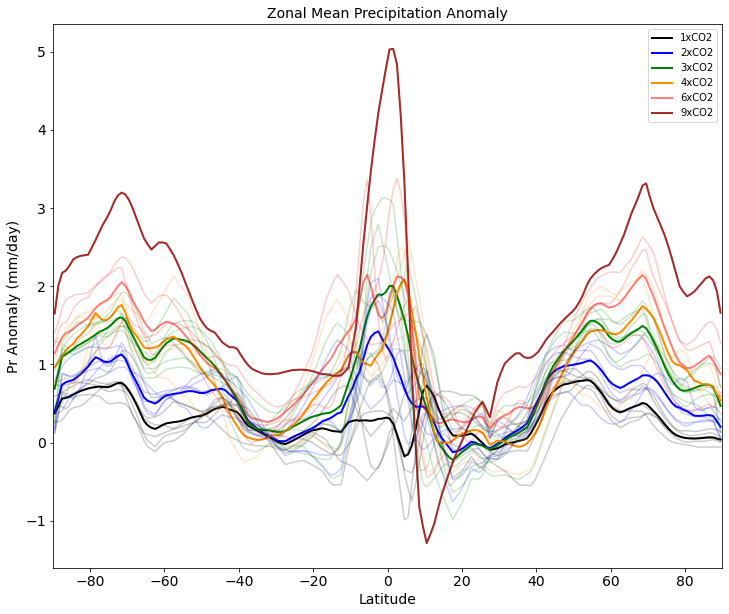

In [38]:
# Plot zonal mean precip anomalies

plt.figure(figsize=(12,10))

plt.plot(lat,np.nanmean(pranozonal[:,:,0],1), color='black', label='1xCO2', linewidth=2.0);
plt.plot(lat,np.nanmean(pranozonal[:,:,1],1), color='blue', label='2xCO2', linewidth=2.0)
plt.plot(lat,np.nanmean(pranozonal[:,:,2],1), color='green', label='3xCO2', linewidth=2.0)
plt.plot(lat,np.nanmean(pranozonal[:,:,3],1), color='darkorange',label='4xCO2', linewidth=2.0)
plt.plot(lat,np.nanmean(pranozonal[:,:,4],1), color='red',label='6xCO2', alpha=.5, linewidth=2.0)
plt.plot(lat,np.nanmean(pranozonal[:,:,5],1), color='brown', label='9xCO2', linewidth=2.0)
    
plt.title('Zonal Mean Precipitation Anomaly', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Pr Anomaly (mm/day)', fontsize=14)
#plt.legend(proj_name[1:])
plt.legend()
plt.xlim([-90, 90])
plt.tick_params(labelsize=14)

for i in range(len(model)):
    plt.plot(lat,pranozonal[:,i,0], color='black', label='1xCO2', alpha=.2);
    plt.plot(lat,pranozonal[:,i,1], color='blue', label='2xCO2', alpha=.2)
    plt.plot(lat,pranozonal[:,i,2], color='green', label='3xCO2', alpha=.2)
    plt.plot(lat,pranozonal[:,i,3], color='darkorange',label='4xCO2', alpha=.2)
    plt.plot(lat,pranozonal[:,i,4], color='red',label='6xCO2', alpha=.2)
    plt.plot(lat,pranozonal[:,i,5], color='brown', label='9xCO2', alpha=.2)
    
#plt.savefig('./plots/pranozonal.png',dpi=300)
plt.savefig('./plots/pranozonal.pdf', format='pdf')

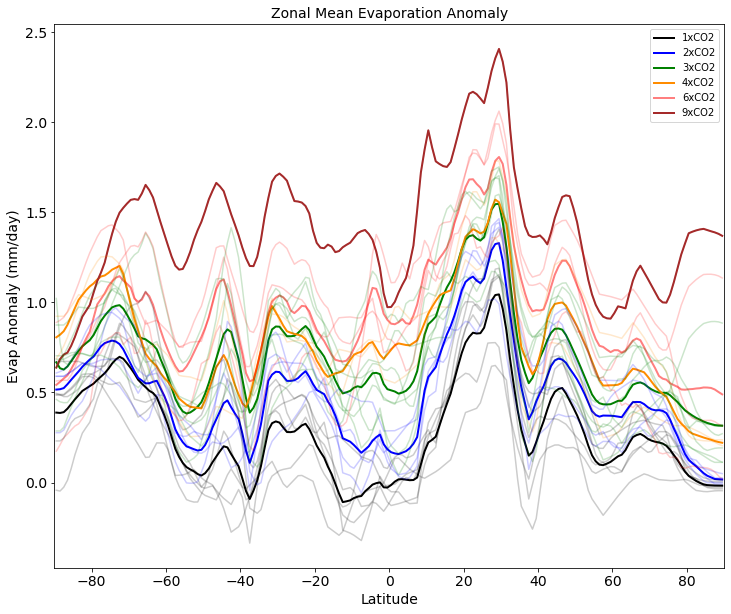

In [39]:
# Plot zonal mean surface temperature anomalies
plt.figure(figsize=(12,10))

plt.plot(lat,np.nanmean(evanozonal[:,:,0],1), color='black', label='1xCO2', linewidth=2.0);
plt.plot(lat,np.nanmean(evanozonal[:,:,1],1), color='blue', label='2xCO2', linewidth=2.0)
plt.plot(lat,np.nanmean(evanozonal[:,:,2],1), color='green', label='3xCO2', linewidth=2.0)
plt.plot(lat,np.nanmean(evanozonal[:,:,3],1), color='darkorange',label='4xCO2', linewidth=2.0)
plt.plot(lat,np.nanmean(evanozonal[:,:,4],1), color='red',label='6xCO2', alpha=.5 ,linewidth=2.0)
plt.plot(lat,np.nanmean(evanozonal[:,:,5],1), color='brown', label='9xCO2', linewidth=2.0)
    
plt.title('Zonal Mean Evaporation Anomaly', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Evap Anomaly (mm/day)', fontsize=14)
#plt.legend(proj_name[1:])
plt.legend()
plt.xlim([-90, 90])
plt.tick_params(labelsize=14)

for i in range(len(model)):
    plt.plot(lat,evanozonal[:,i,0], color='black', label='1xCO2', alpha=.2);
    plt.plot(lat,evanozonal[:,i,1], color='blue', label='2xCO2', alpha=.2)
    plt.plot(lat,evanozonal[:,i,2], color='green', label='3xCO2', alpha=.2)
    plt.plot(lat,evanozonal[:,i,3], color='darkorange',label='4xCO2', alpha=.2)
    plt.plot(lat,evanozonal[:,i,4], color='red',label='6xCO2', alpha=.2)
    plt.plot(lat,evanozonal[:,i,5], color='brown', label='9xCO2', alpha=.2)
    
#plt.savefig('./plots/evanozonal.png',dpi=300)
plt.savefig('./plots/evanozonal.pdf', format='pdf')

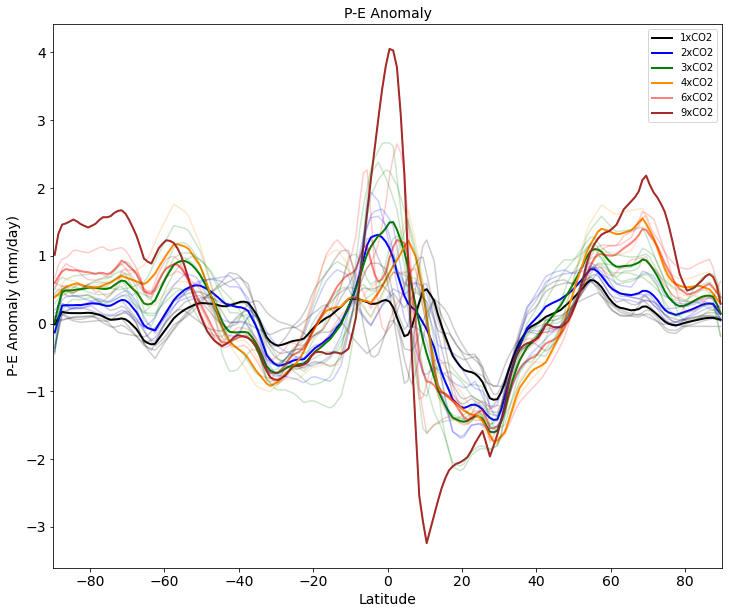

In [40]:
# Plot zonal mean P-E anomalies
plt.figure(figsize=(12,10))

plt.plot(lat,np.nanmean(peanozonal[:,:,0],1), color='black', label='1xCO2',linewidth=2.0);
plt.plot(lat,np.nanmean(peanozonal[:,:,1],1), color='blue', label='2xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(peanozonal[:,:,2],1), color='green', label='3xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(peanozonal[:,:,3],1), color='darkorange',label='4xCO2',linewidth=2.0)
plt.plot(lat,np.nanmean(peanozonal[:,:,4],1), color='red', label='6xCO2', alpha=.5, linewidth=2.0)
plt.plot(lat,np.nanmean(peanozonal[:,:,5],1), color='brown', label='9xCO2', linewidth=2.0)
    
plt.title('P-E Anomaly', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('P-E Anomaly (mm/day)', fontsize=14)
#plt.legend(proj_name[1:])
plt.legend()
plt.xlim([-90, 90])
plt.tick_params(labelsize=14)

for i in range(len(model)):
    plt.plot(lat,peanozonal[:,i,0], color='black', label='1xCO2', alpha=.2);
    plt.plot(lat,peanozonal[:,i,1], color='blue', label='2xCO2', alpha=.2)
    plt.plot(lat,peanozonal[:,i,2], color='green', label='3xCO2', alpha=.2)
    plt.plot(lat,peanozonal[:,i,3], color='darkorange',label='4xCO2', alpha=.2)
    plt.plot(lat,peanozonal[:,i,4], color='red', label='6xCO2', alpha=.2)
    plt.plot(lat,peanozonal[:,i,5], color='brown', label='9xCO2', alpha=.2)
    
#plt.savefig('./plots/peanozonal.png',dpi=300)
plt.savefig('./plots/peanozonal.pdf', format='pdf')

**Plot Scatter plots**

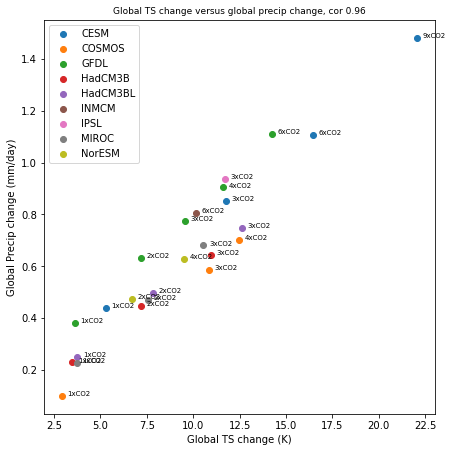

In [41]:
# Plot global mean precip versus global mean surface temp
plt.figure(figsize=(12,12))

for i in range(len(model)):
    plt.subplot(2,2,1)
    plt.scatter(GTs[i,:], Gpr[i,:])
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (GTs[i,j]+.3, Gpr[i,j]),fontsize=7)
    cor=np.corrcoef(GTs[~np.isnan(Gpr)],Gpr[~np.isnan(Gpr)])[0,1]
    plt.title('Global TS change versus global precip change, cor '+ str(np.around(cor,2)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Global Precip change (mm/day)")
    
        
plt.legend(model_name)
plt.tight_layout()
plt.rcParams['pdf.fonttype']=42
plt.savefig('./plots/scatter_plot_globalprchange_vs_globaltschange.pdf', format='pdf')

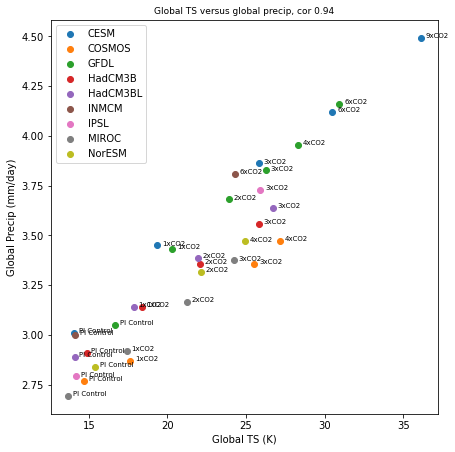

In [42]:
# Plot global mean precip versus global mean surface temp
plt.figure(figsize=(12,12))

for i in range(len(model)):
    plt.subplot(2,2,1)
    plt.scatter(Gts_abs[i,:], Gpr_abs[i,:])
    for j in range(len(proj)):
        plt.annotate(proj_name[j][:], (Gts_abs[i,j]+.3, Gpr_abs[i,j]),fontsize=7)
    cor=np.corrcoef(Gts_abs[~np.isnan(Gpr_abs)],Gpr_abs[~np.isnan(Gpr_abs)])[0,1]
    plt.title('Global TS versus global precip, cor '+ str(np.around(cor,2)),fontsize=9)
    plt.xlabel("Global TS (K)")
    plt.ylabel("Global Precip (mm/day)")
    
        
plt.legend(model_name)
plt.tight_layout()
plt.rcParams['pdf.fonttype']=42
plt.savefig('./plots/scatter_plot_globalpr_vs_globalts.pdf', format='pdf')

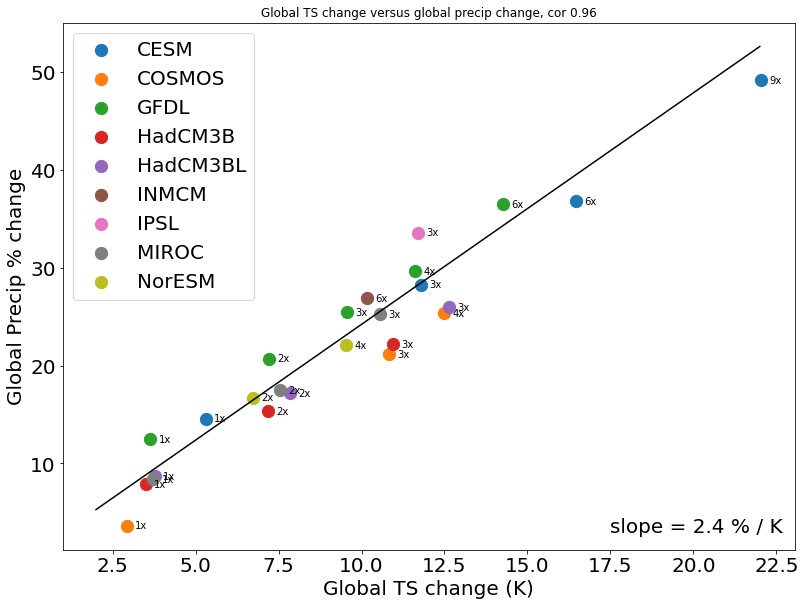

In [43]:
# Plot global mean precip versus global mean surface temp
plt.figure(figsize=(22,16))

for i in range(len(model)):
    plt.subplot(2,2,1)
    plt.scatter(GTs[i,:], Gpr[i,:]/Gpr_abs[i,0]*100,s=150)
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][0:2], (GTs[i,j]+.25, Gpr[i,j]/Gpr_abs[i,0]*100-0.3),fontsize=10)

cor=np.corrcoef(GTs[~np.isnan(Gpr)],Gpr[~np.isnan(Gpr)]/Gpr_abs[i,0]*100)[0,1]
plt.title('Global TS change versus global precip change, cor '+ str(np.around(cor,2)),fontsize=12)
plt.xlabel("Global TS change (K)",fontsize=20)
plt.ylabel("Global Precip % change",fontsize=20)
plt.legend(model_name,fontsize=20)
plt.tick_params(labelsize=20)

[m_fit,b_fit]=np.polyfit(GTs[~np.isnan(Gpr)],Gpr[~np.isnan(Gpr)]/Gpr_abs[i,0]*100,1)
x=range(2,23,1)
y_fit=m_fit*x+b_fit
plt.plot(x,y_fit,'k-')
plt.annotate('slope = '+str(np.around(m_fit,decimals=1))+' % / K', (17.5, 3), fontsize=20)

plt.tight_layout()
#plt.rcParams['pdf.fonttype']=42
plt.savefig('./plots/Fig3_scatter_plot_globalprPRECENTchange_vs_globaltschange.pdf', format='pdf')

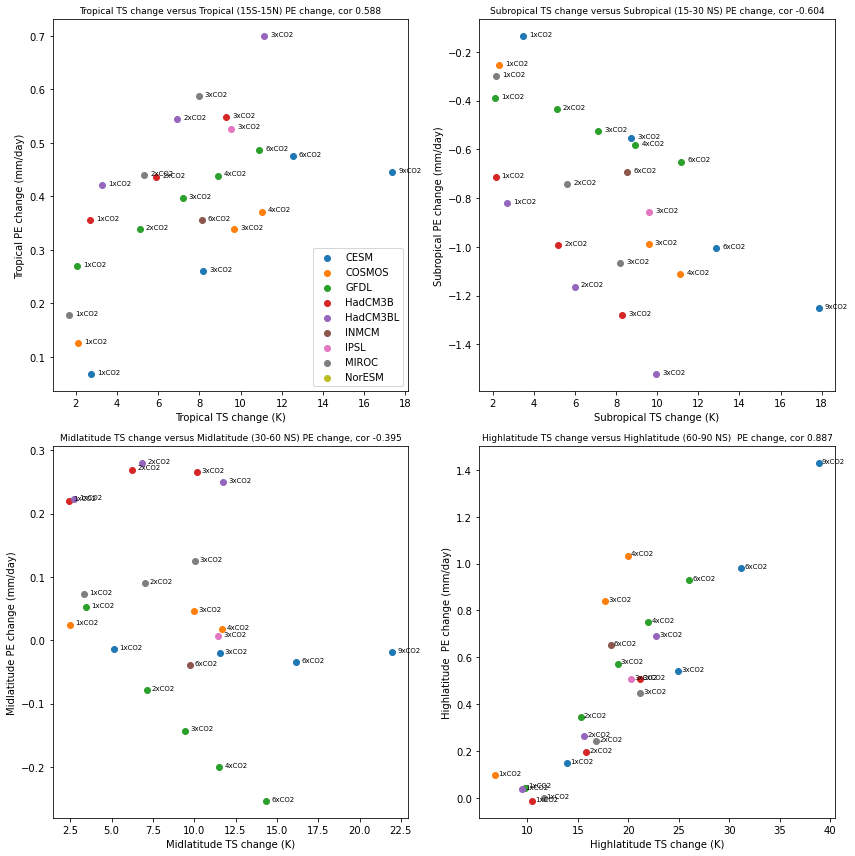

In [44]:
plt.figure(figsize=(12,12))

for i in range(len(model)):
    plt.subplot(2,2,1)
    plt.scatter(Tts[i,:], Tpe[i,:])
    cor=np.corrcoef(Tts[~np.isnan(Tpe)],Tpe[~np.isnan(Tpe)])[0,1]
    plt.title('Tropical TS change versus Tropical (15S-15N) PE change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Tropical TS change (K)")
    plt.ylabel("Tropical PE change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (Tts[i,j]+.3, Tpe[i,j]),fontsize=7)
    plt.legend(model_name,loc='lower right')

    plt.subplot(2,2,2)
    cor=np.corrcoef(subts[~np.isnan(subpe)],subpe[~np.isnan(subpe)])[0,1]
    plt.scatter(subts[i,:], subpe[i,:])
    plt.title('Subropical TS change versus Subropical (15-30 NS) PE change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Subropical TS change (K)")
    plt.ylabel("Subropical PE change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (subts[i,j]+.3, subpe[i,j]),fontsize=7)
        
    plt.subplot(2,2,3)
    plt.scatter(Mts[i,:], Mpe[i,:])
    cor=np.corrcoef(Mts[~np.isnan(Tpe)],Mpe[~np.isnan(Tpe)])[0,1]
    plt.title('Midlatitude TS change versus Midlatitude (30-60 NS) PE change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Midlatitude TS change (K)")
    plt.ylabel("Midlatitude PE change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (Mts[i,j]+.3, Mpe[i,j]),fontsize=7)
        
    plt.subplot(2,2,4)
    cor=np.corrcoef(Pts[~np.isnan(subpe)],Ppe[~np.isnan(subpe)])[0,1]
    plt.scatter(Pts[i,:], Ppe[i,:])
    plt.title('Highlatitude TS change versus Highlatitude (60-90 NS)  PE change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Highlatitude TS change (K)")
    plt.ylabel("Highlatitude  PE change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (Pts[i,j]+.3, Ppe[i,j]),fontsize=7)

plt.tight_layout()
plt.rcParams['pdf.fonttype']=42
#plt.savefig("./plots/scatter_plot_change_local.png",dpi=300)
plt.savefig('./plots/scatter_plot_change_local.pdf', format='pdf')

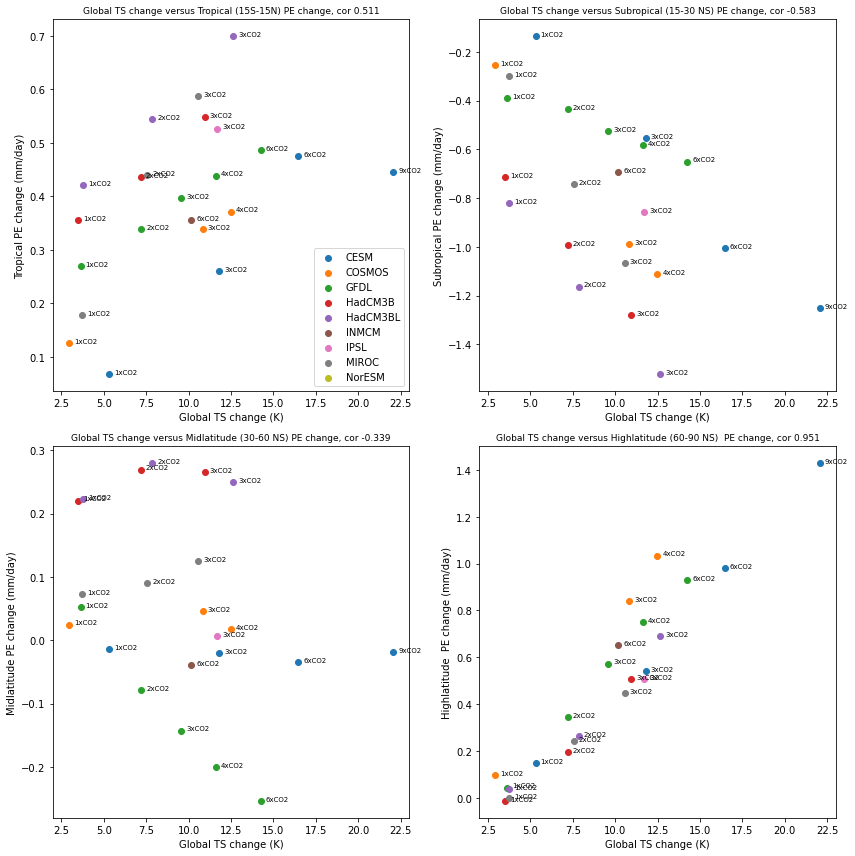

In [45]:
plt.figure(figsize=(12,12))

for i in range(len(model)):
    plt.subplot(2,2,1)
    plt.scatter(GTs[i,:], Tpe[i,:])
    cor=np.corrcoef(GTs[~np.isnan(Tpe)],Tpe[~np.isnan(Tpe)])[0,1]
    plt.title('Global TS change versus Tropical (15S-15N) PE change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Tropical PE change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (GTs[i,j]+.3, Tpe[i,j]),fontsize=7)
    plt.legend(model_name,loc='lower right')

    plt.subplot(2,2,2)
    cor=np.corrcoef(GTs[~np.isnan(subpe)],subpe[~np.isnan(subpe)])[0,1]
    plt.scatter(GTs[i,:], subpe[i,:])
    plt.title('Global TS change versus Subropical (15-30 NS) PE change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Subropical PE change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (GTs[i,j]+.3, subpe[i,j]),fontsize=7)

    plt.subplot(2,2,3)
    plt.scatter(GTs[i,:], Mpe[i,:])
    cor=np.corrcoef(GTs[~np.isnan(Tpe)],Mpe[~np.isnan(Tpe)])[0,1]
    plt.title('Global TS change versus Midlatitude (30-60 NS) PE change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Midlatitude PE change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (GTs[i,j]+.3, Mpe[i,j]),fontsize=7)
        
    plt.subplot(2,2,4)
    cor=np.corrcoef(GTs[~np.isnan(subpe)],Ppe[~np.isnan(subpe)])[0,1]
    plt.scatter(GTs[i,:], Ppe[i,:])
    plt.title('Global TS change versus Highlatitude (60-90 NS)  PE change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Highlatitude  PE change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (GTs[i,j]+.3, Ppe[i,j]),fontsize=7)     
        

plt.tight_layout()
plt.rcParams['pdf.fonttype']=42
#plt.savefig("./plots/scatter_plot_change_global.png",dpi=300)
plt.savefig('./plots/scatter_plot_change_global.pdf', format='pdf')


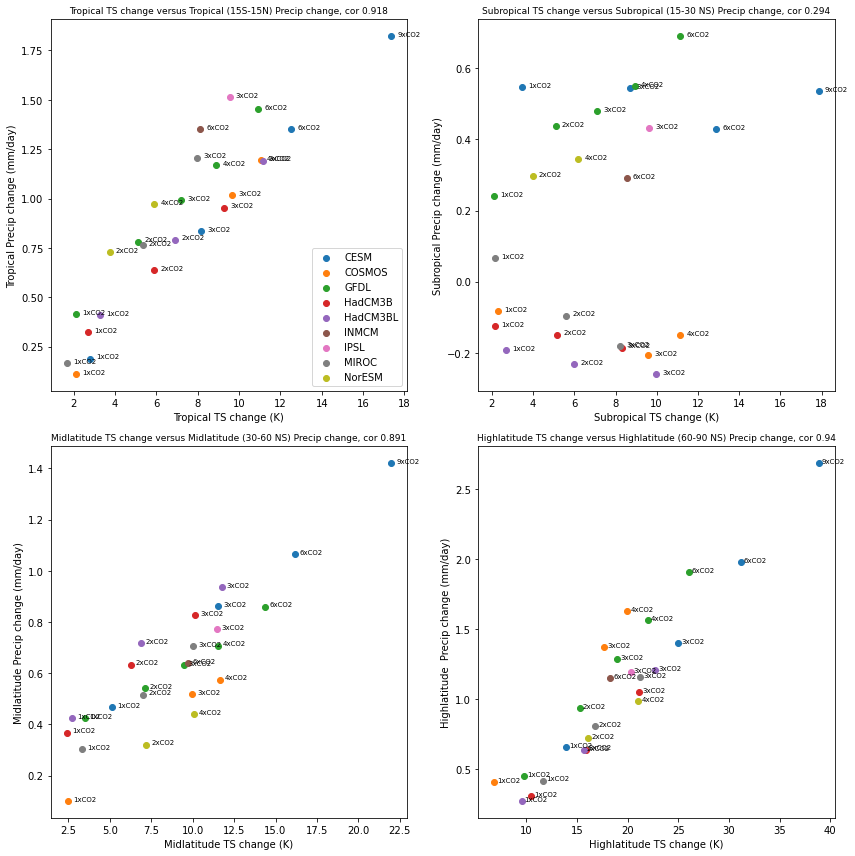

In [46]:
plt.figure(figsize=(12,12))
        
for i in range(len(model)):
    plt.subplot(2,2,1)
    plt.scatter(Tts[i,:], Tpr[i,:])
    cor=np.corrcoef(Tts[~np.isnan(Tpr)],Tpr[~np.isnan(Tpr)])[0,1]
    plt.title('Tropical TS change versus Tropical (15S-15N) Precip change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Tropical TS change (K)")
    plt.ylabel("Tropical Precip change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (Tts[i,j]+.3, Tpr[i,j]),fontsize=7)
    plt.legend(model_name,loc='lower right')

    plt.subplot(2,2,2)
    plt.scatter(subts[i,:], subpr[i,:])
    cor=np.corrcoef(subts[~np.isnan(subpr)],subpr[~np.isnan(subpr)])[0,1]
    plt.title('Subropical TS change versus Subropical (15-30 NS) Precip change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Subropical TS change (K)")
    plt.ylabel("Subropical Precip change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (subts[i,j]+.3, subpr[i,j]),fontsize=7)

    plt.subplot(2,2,3)
    plt.scatter(Mts[i,:], Mpr[i,:])
    cor=np.corrcoef(Mts[~np.isnan(Mpr)],Mpr[~np.isnan(Mpr)])[0,1]
    plt.title('Midlatitude TS change versus Midlatitude (30-60 NS) Precip change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Midlatitude TS change (K)")
    plt.ylabel("Midlatitude Precip change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (Mts[i,j]+.3, Mpr[i,j]),fontsize=7)   
        
    plt.subplot(2,2,4)
    plt.scatter(Pts[i,:], Ppr[i,:])
    cor=np.corrcoef(Pts[~np.isnan(Ppr)],Ppr[~np.isnan(Ppr)])[0,1]
    plt.title('Highlatitude TS change versus Highlatitude (60-90 NS) Precip change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Highlatitude TS change (K)")
    plt.ylabel("Highlatitude  Precip change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (Pts[i,j]+.3, Ppr[i,j]),fontsize=7)
        
plt.tight_layout()
plt.rcParams['pdf.fonttype']=42
#plt.savefig("./plots/scatter_plot_prchange_local.png",dpi=300)
plt.savefig('./plots/scatter_plot_prchange_local.pdf', format='pdf')

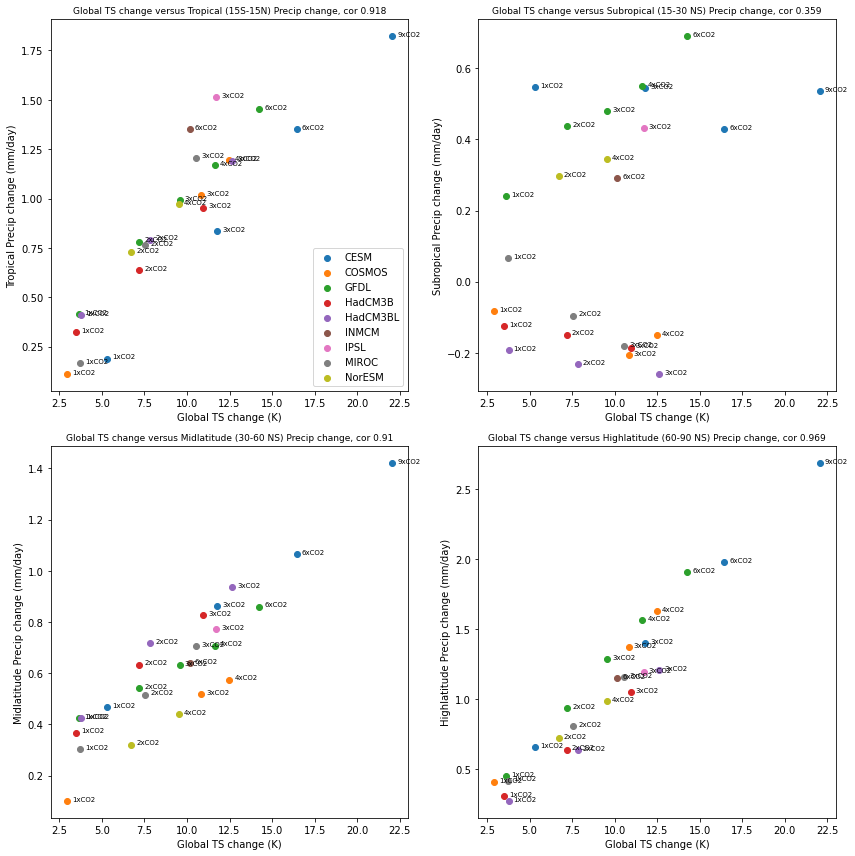

In [47]:
plt.figure(figsize=(12,12))
        
for i in range(len(model)):
    plt.subplot(2,2,1)
    plt.scatter(GTs[i,:], Tpr[i,:])
    cor=np.corrcoef(GTs[~np.isnan(Tpr)],Tpr[~np.isnan(Tpr)])[0,1]
    plt.title('Global TS change versus Tropical (15S-15N) Precip change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Tropical Precip change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (GTs[i,j]+.3, Tpr[i,j]),fontsize=7)
    plt.legend(model_name,loc='lower right')

    plt.subplot(2,2,2)
    plt.scatter(GTs[i,:], subpr[i,:])
    cor=np.corrcoef(GTs[~np.isnan(subpr)],subpr[~np.isnan(subpr)])[0,1]
    plt.title('Global TS change versus Subropical (15-30 NS) Precip change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Subropical Precip change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (GTs[i,j]+.3, subpr[i,j]),fontsize=7)

    plt.subplot(2,2,3)
    plt.scatter(GTs[i,:], Mpr[i,:])
    cor=np.corrcoef(GTs[~np.isnan(Tpr)],Mpr[~np.isnan(Tpr)])[0,1]
    plt.title('Global TS change versus Midlatitude (30-60 NS) Precip change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Midlatitude Precip change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (GTs[i,j]+.3, Mpr[i,j]),fontsize=7)
        
    plt.subplot(2,2,4)
    cor=np.corrcoef(GTs[~np.isnan(subpr)],Ppr[~np.isnan(subpr)])[0,1]
    plt.scatter(GTs[i,:], Ppr[i,:])
    plt.title('Global TS change versus Highlatitude (60-90 NS) Precip change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Highlatitude Precip change (mm/day)")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][:], (GTs[i,j]+.3, Ppr[i,j]),fontsize=7)    
        
plt.tight_layout()
plt.rcParams['pdf.fonttype']=42
#plt.savefig("./plots/scatter_plot_prchange_global.png",dpi=300)
plt.savefig('./plots/scatter_plot_prchange_global.pdf', format='pdf')

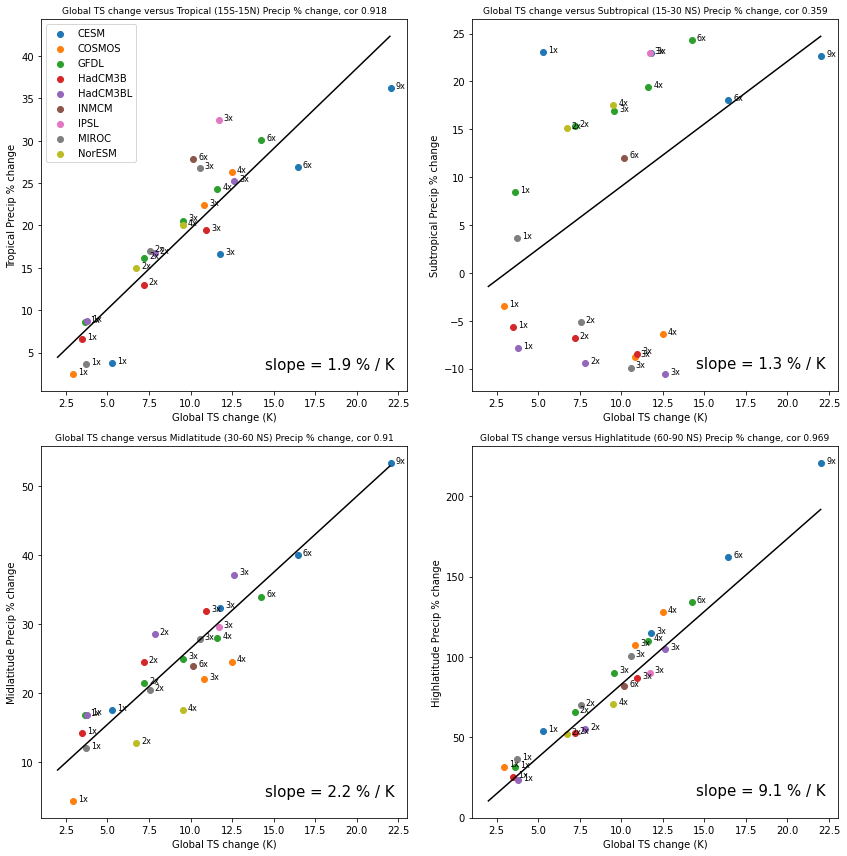

In [48]:
plt.figure(figsize=(12,12))
        
for i in range(len(model)):
    plt.subplot(2,2,1)
    plt.scatter(GTs[i,:], Tpr[i,:]/Tpr_abs[i,0]*100)
    cor=np.corrcoef(GTs[~np.isnan(Tpr)],Tpr[~np.isnan(Tpr)]/Tpr_abs[i,0]*100)[0,1]
    plt.title('Global TS change versus Tropical (15S-15N) Precip % change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Tropical Precip % change")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][0:2], (GTs[i,j]+.3, Tpr[i,j]/Tpr_abs[i,0]*100),fontsize=8)
    plt.legend(model_name,loc='upper left')
    
    plt.subplot(2,2,2)
    plt.scatter(GTs[i,:], subpr[i,:]/subpr_abs[i,0]*100)
    cor=np.corrcoef(GTs[~np.isnan(subpr)],subpr[~np.isnan(subpr)]/subpr_abs[i,0]*100)[0,1]
    plt.title('Global TS change versus Subtropical (15-30 NS) Precip % change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Subtropical Precip % change")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][0:2], (GTs[i,j]+.3, subpr[i,j]/subpr_abs[i,0]*100),fontsize=8)
        
    plt.subplot(2,2,3)
    plt.scatter(GTs[i,:], Mpr[i,:]/Mpr_abs[i,0]*100)
    cor=np.corrcoef(GTs[~np.isnan(Mpr)],Mpr[~np.isnan(Mpr)]/Mpr_abs[i,0]*100)[0,1]
    plt.title('Global TS change versus Midlatitude (30-60 NS) Precip % change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Midlatitude Precip % change")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][0:2], (GTs[i,j]+.3, Mpr[i,j]/Mpr_abs[i,0]*100),fontsize=8) 
        
    plt.subplot(2,2,4)
    plt.scatter(GTs[i,:], Ppr[i,:]/Ppr_abs[i,0]*100)
    cor=np.corrcoef(GTs[~np.isnan(Ppr)],Ppr[~np.isnan(Ppr)]/Ppr_abs[i,0]*100)[0,1]
    plt.title('Global TS change versus Highlatitude (60-90 NS) Precip % change, cor '+ str(np.around(cor,3)),fontsize=9)
    plt.xlabel("Global TS change (K)")
    plt.ylabel("Highlatitude Precip % change")
    for j in range(len(proj)-1):
        plt.annotate(proj_name[j+1][0:2], (GTs[i,j]+.3, Ppr[i,j]/Ppr_abs[i,0]*100),fontsize=8)         

plt.subplot(2,2,1)        
[m_fit,b_fit]=np.polyfit(GTs[~np.isnan(Tpr)],Tpr[~np.isnan(Tpr)]/Tpr_abs[i,0]*100,1)
x=range(2,23,1)
y_fit=m_fit*x+b_fit
plt.plot(x,y_fit,'k-')
plt.annotate('slope = '+str(np.around(m_fit,decimals=1))+' % / K', (14.5, 3), fontsize=15)

plt.subplot(2,2,2)        
[m_fit,b_fit]=np.polyfit(GTs[~np.isnan(subpr)],subpr[~np.isnan(subpr)]/subpr_abs[i,0]*100,1)
x=range(2,23,1)
y_fit=m_fit*x+b_fit
plt.plot(x,y_fit,'k-')
plt.annotate('slope = '+str(np.around(m_fit,decimals=1))+' % / K', (14.5, -10), fontsize=15)

plt.subplot(2,2,3)        
[m_fit,b_fit]=np.polyfit(GTs[~np.isnan(Mpr)],Mpr[~np.isnan(Mpr)]/Mpr_abs[i,0]*100,1)
x=range(2,23,1)
y_fit=m_fit*x+b_fit
plt.plot(x,y_fit,'k-')
plt.annotate('slope = '+str(np.around(m_fit,decimals=1))+' % / K', (14.5, 5), fontsize=15)

plt.subplot(2,2,4)        
[m_fit,b_fit]=np.polyfit(GTs[~np.isnan(Ppr)],Ppr[~np.isnan(subpr)]/Ppr_abs[i,0]*100,1)
x=range(2,23,1)
y_fit=m_fit*x+b_fit
plt.plot(x,y_fit,'k-')
plt.annotate('slope = '+str(np.around(m_fit,decimals=1))+' % / K', (14.5, 14), fontsize=15)
        
        
plt.tight_layout()
plt.rcParams['pdf.fonttype']=42
#plt.savefig("./plots/Fig5_scatter_plot_prprecentchange_global.png",dpi=300)
plt.savefig('./plots/Fig5_scatter_plot_prprecentchange_global.pdf', format='pdf')